In [1]:
import pyspark
from pyspark.sql.functions import col, to_timestamp
from pyspark.sql import SparkSession
import os
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

train_directory = "/Users/evangelosgeraridis/Desktop/MEAZON/September 2022"
test_directory = "/Users/evangelosgeraridis/Desktop/MEAZON/October 2022"

options = {
    "header": "true",
    "sep": ",",
    "multiLine": "true",
    "quote": "\"",
    "escape": "\"",
    "ignoreTrailingWhiteSpace": True
}

train_dataframes = {}
test_dataframes = {}

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Spark_LR_Meazon_timeperiod.com") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

import logging
spark.sparkContext.setLogLevel("ERROR")
logging.getLogger("py4j").setLevel(logging.ERROR)

# Process train data
for file in os.listdir(train_directory):
    file_path = os.path.join(train_directory, file)
    if os.path.isfile(file_path) and file.endswith(".csv"):
        df = spark.read.options(**options).csv(file_path)
        train_dataframes[file] = df

# Process test data
for file in os.listdir(test_directory):
    file_path = os.path.join(test_directory, file)
    if os.path.isfile(file_path) and file.endswith(".csv"):
        df = spark.read.options(**options).csv(file_path)
        test_dataframes[file] = df


23/08/10 14:45:40 WARN Utils: Your hostname, Evangeloss-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.2.2 instead (on interface en0)
23/08/10 14:45:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/08/10 14:45:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
entry_counts = []

# Count entries in train DataFrames
for name, df in train_dataframes.items():
    count_value = df.count()
    entry_counts.append(count_value)
    print("Number of entries in", name, ":", count_value)

# Find the minimum count
min_count = min(entry_counts)
print("Minimum count of entries:", min_count)


Number of entries in washing_machineS.csv : 81076
Number of entries in AggregatedS.csv : 317099
Number of entries in dishwasherS.csv : 37314
Number of entries in water_heaterS.csv : 317099
Number of entries in fridgeS.csv : 79577
Number of entries in microwaveS.csv : 70790
Number of entries in hotplateS.csv : 36615
Minimum count of entries: 36615


In [3]:
entry_counts = []

# Count entries in train DataFrames
for name, df in test_dataframes.items():
    count_value = df.count()
    entry_counts.append(count_value)
    print("Number of entries in", name, ":", count_value)

# Find the minimum count
min_count = min(entry_counts)
print("Minimum count of entries:", min_count)


Number of entries in microwaveO.csv : 23901
Number of entries in hotplateO.csv : 16042
Number of entries in fridgeO.csv : 39472
Number of entries in water_heaterO.csv : 198602
Number of entries in dishwasherO.csv : 16852
Number of entries in AggregatedO.csv : 198602
Number of entries in washing_machineO.csv : 42037
Minimum count of entries: 16042


In [4]:
limited_train_dataframes = {}

# Apply the limit to each train DataFrame
for key, df in train_dataframes.items():
    limited_train_dataframes[key] = df.limit(36615)


In [5]:
limited_test_dataframes = {}

# Apply the limit to each train DataFrame
for key, df in test_dataframes.items():
    limited_test_dataframes[key] = df.limit(16042)


In [6]:
limited_train_dataframes

{'washing_machineS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'AggregatedS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'dishwasherS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'water_heaterS.csv': DataFrame[ts: string, pwrC: string, apwrC: string, curC: string, vltC: string, screC: string],
 'fridgeS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'microwaveS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'hotplateS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string]}

In [7]:
limited_test_dataframes

{'microwaveO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'hotplateO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'fridgeO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'water_heaterO.csv': DataFrame[ts: string, pwrC: string, apwrC: string, curC: string, vltC: string, screC: string],
 'dishwasherO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'AggregatedO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'washing_machineO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string]}

In [8]:
washing_machine_train = limited_train_dataframes['washing_machineS.csv'].drop('ts').dropna()
aggregated_train = limited_train_dataframes['AggregatedS.csv'].drop('ts').dropna()
dishwasher_train = limited_train_dataframes['dishwasherS.csv'].drop('ts').dropna()
water_heater_train = limited_train_dataframes['water_heaterS.csv'].drop('ts').dropna()
fridge_train = limited_train_dataframes['fridgeS.csv'].drop('ts').dropna()
microwave_train = limited_train_dataframes['microwaveS.csv'].drop('ts').dropna()
hotplate_train = limited_train_dataframes['hotplateS.csv'].drop('ts').dropna()

In [9]:
washing_machine_test = limited_test_dataframes['washing_machineO.csv'].drop('ts').dropna()
aggregated_test = limited_test_dataframes['AggregatedO.csv'].drop('ts').dropna()
dishwasher_test = limited_test_dataframes['dishwasherO.csv'].drop('ts').dropna()
water_heater_test = limited_test_dataframes['water_heaterO.csv'].drop('ts').dropna()
fridge_test = limited_test_dataframes['fridgeO.csv'].drop('ts').dropna()
microwave_test = limited_test_dataframes['microwaveO.csv'].drop('ts').dropna()
hotplate_test = limited_test_dataframes['hotplateO.csv'].drop('ts').dropna()

In [10]:
dataframes = [fridge_train,fridge_test,dishwasher_train,dishwasher_test,hotplate_train,hotplate_test,microwave_train,microwave_test,
            washing_machine_train,washing_machine_test ,water_heater_train,water_heater_test,aggregated_train,aggregated_test]

modified_dataframes = []
for df in dataframes:
    for column in df.columns:
        df = df.withColumn(column, col(column).cast(DoubleType()))

    # Append the modified dataframe to the new list
    modified_dataframes.append(df)

# Assign the modified dataframes back to individual variables
fridge_train,fridge_test,dishwasher_train,dishwasher_test,hotplate_train,hotplate_test,microwave_train,microwave_test, washing_machine_train,washing_machine_test ,water_heater_train,water_heater_test,aggregated_train,aggregated_test= modified_dataframes

for df in modified_dataframes:
    df = df.dropna()
    df.show(20)
    df.printSchema()
    print(df.count())


+-------+-------+-----+-------+-----+
|   pwrA|  apwrA| curA|   vltA|screA|
+-------+-------+-----+-------+-----+
|126.163| 200.32|0.912|220.036|0.754|
|126.112|  200.1|0.913|219.542|0.753|
|126.236|199.859|0.911|219.856| 0.76|
|126.321|200.896|0.915|220.039|0.755|
|126.341|202.959|0.922| 220.45|0.786|
|126.231| 201.28|0.911| 221.45|0.773|
| 25.111| 42.974|0.196|220.772|0.258|
| 16.665| 20.602|0.094|220.762|  0.9|
| 15.262| 15.951|0.072|220.778|0.668|
| 14.963| 15.163|0.069|220.781|1.007|
| 14.964| 15.111|0.069|220.793|0.701|
| 14.955| 15.118|0.069|220.797|0.695|
|   14.8| 14.888|0.068|220.739|0.702|
| 14.789| 14.872|0.068|220.745|0.708|
| 14.626| 14.723|0.067|220.739|0.707|
| 14.756| 14.904|0.068|220.732|0.699|
| 14.623|   14.7|0.067|220.711|0.708|
| 14.617| 14.755|0.067|220.667|0.714|
| 14.669| 14.908|0.068|220.602|0.912|
| 14.846|  15.04|0.068|220.643| 0.69|
+-------+-------+-----+-------+-----+
only showing top 20 rows

root
 |-- pwrA: double (nullable = true)
 |-- apwrA: double (n

In [18]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the fridge device
input_cols_fridge = aggregated_train.columns
output_cols_fridge = fridge_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_fridge, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_fridge:
    # Create a new LinearRegression model with the corresponding label column
    lr = LinearRegression(featuresCol='scaled_features', labelCol=output_col, maxIter=100, regParam=0.2)
    
    # Update the stages of the pipeline with the new LinearRegression model
    pipeline.setStages([assembler, scaler, lr])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on fridge_test dataset
    predictions = pipeline_model.transform(fridge_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol=output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 4.068422235497255
MSE: 16.552059486288478
MAE: 2.296521093838558
R2: 0.9998017859161472

Metrics for apwrA:
RMSE: 3.960935907179239
MSE: 15.68901326078182
MAE: 2.713931575234679
R2: 0.9998505009884432

Metrics for curA:
RMSE: 0.1323994026697256
MSE: 0.017529601827300147
MAE: 0.08416374781826368
R2: 0.9918494203736276

Metrics for vltA:
RMSE: 0.2337305650555779
MSE: 0.05462997704119974
MAE: 0.19162161815844825
R2: 0.9875223311113476

Metrics for screA:
RMSE: 0.27899991055048606
MSE: 0.07784095008717923
MAE: 0.2770757970037901
R2: -3.594820490609809



In [12]:
predicted_values_screA.show()

+-----+------------------+
|screA|        prediction|
+-----+------------------+
|0.806|1.0722856480063148|
|0.773|1.0495124972614769|
|0.781|1.0575835544254855|
|0.778| 1.053426367399528|
|0.803|1.0689338358243317|
|0.775|1.0527042977407435|
| 0.78|1.0539132194443699|
|0.785|1.0561271782281303|
|0.793|1.0660880415244867|
|0.814|1.0799105806225076|
|0.818|1.0851923322886887|
|0.807|1.0772411575841394|
|0.804|1.0755035096261798|
|0.784|1.0612806054755124|
|0.817|1.0856920284178635|
|0.788| 1.063641666042066|
|0.801| 1.072341922514608|
| 0.85|1.1065437270810699|
|0.785| 1.063713276576716|
|0.804|1.0745394757125994|
+-----+------------------+
only showing top 20 rows



In [19]:
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

In [14]:
predicted_values_pwrA

pwrA   prediction
0       153.442   155.144412
1       153.701   155.380630
2       154.429   156.048520
3       154.536   156.093285
4       154.382   155.918304
...         ...          ...
16037  1062.694  1090.533502
16038  1478.300  1490.050787
16039  1529.723  1535.502077
16040  1388.798  1388.598412
16041  1083.445  1081.257556

[16042 rows x 2 columns]

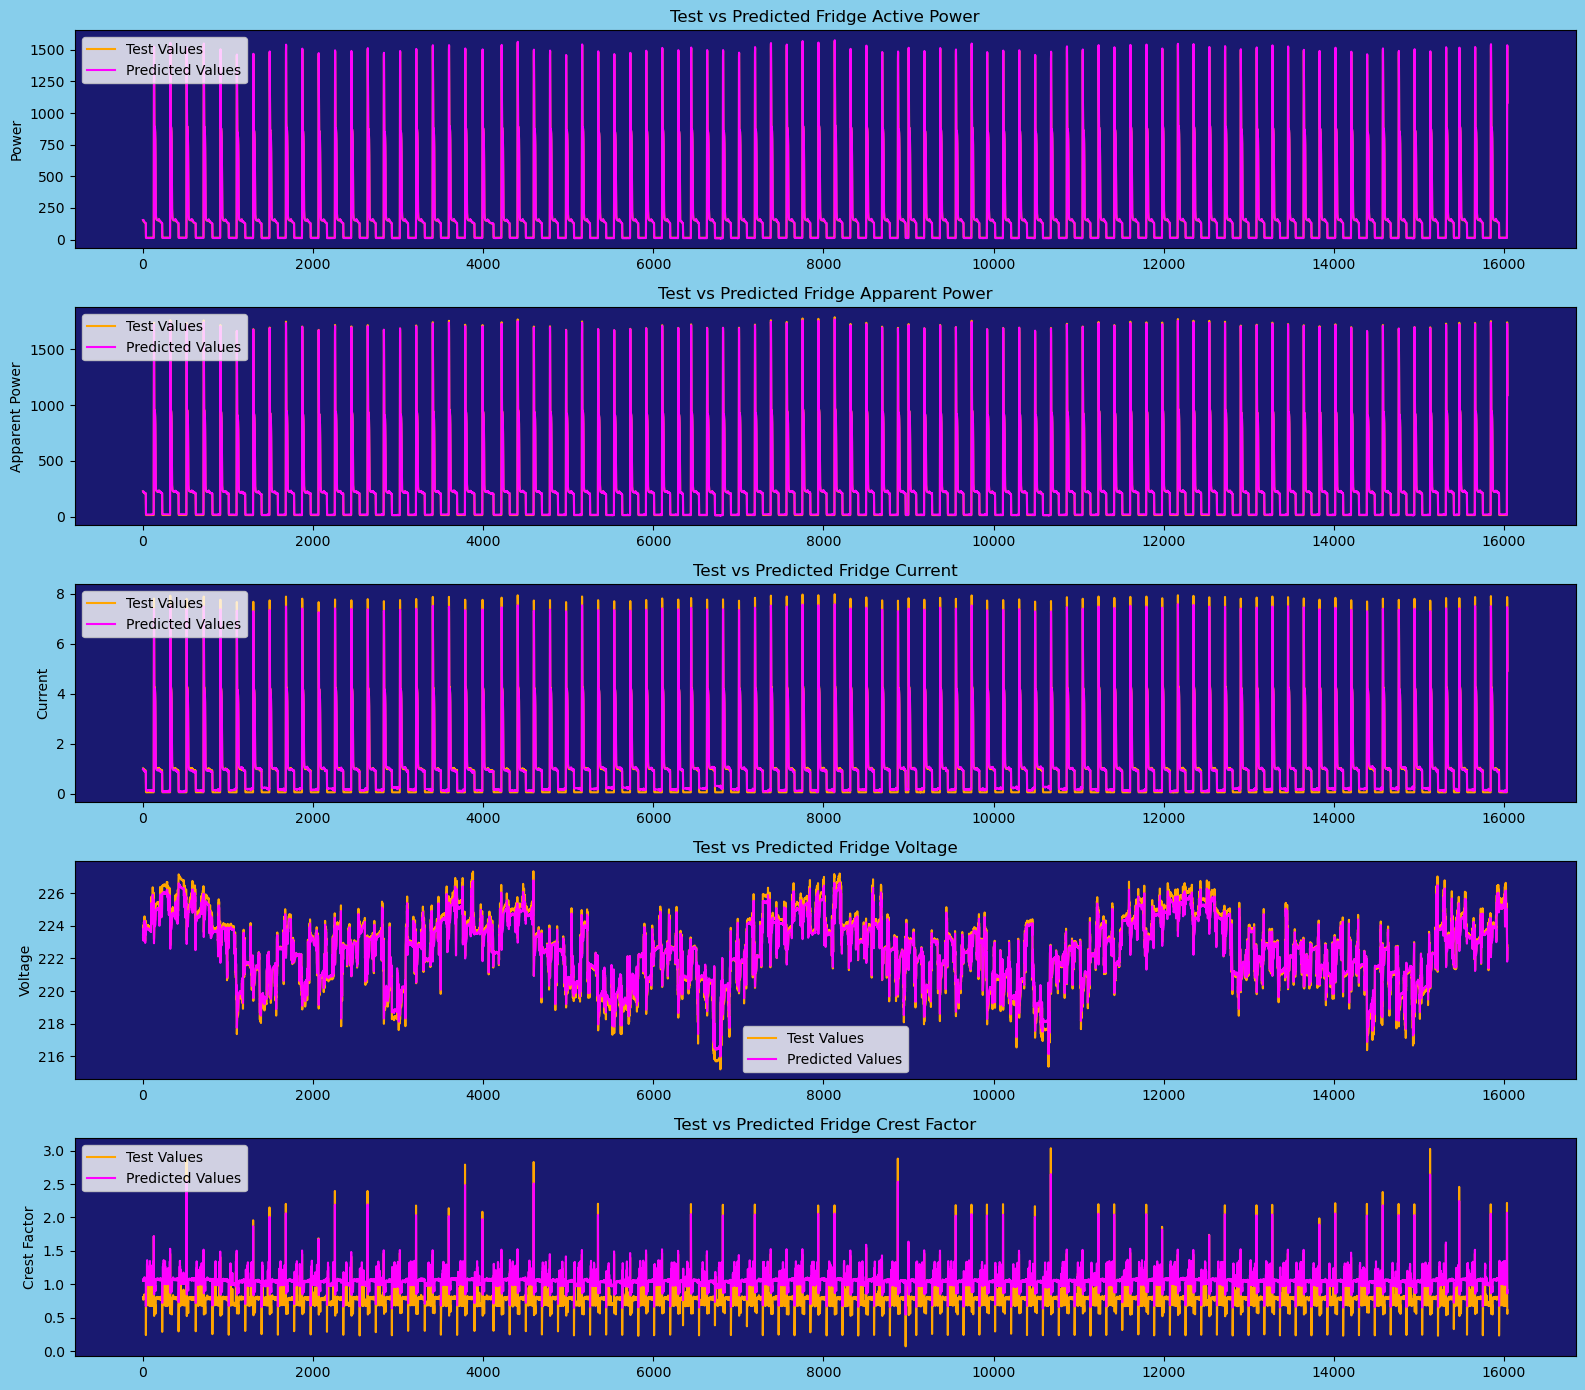

In [20]:
import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Fridge Active Power')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Fridge Apparent Power')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Fridge Current')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Fridge Voltage')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Fridge Crest Factor')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


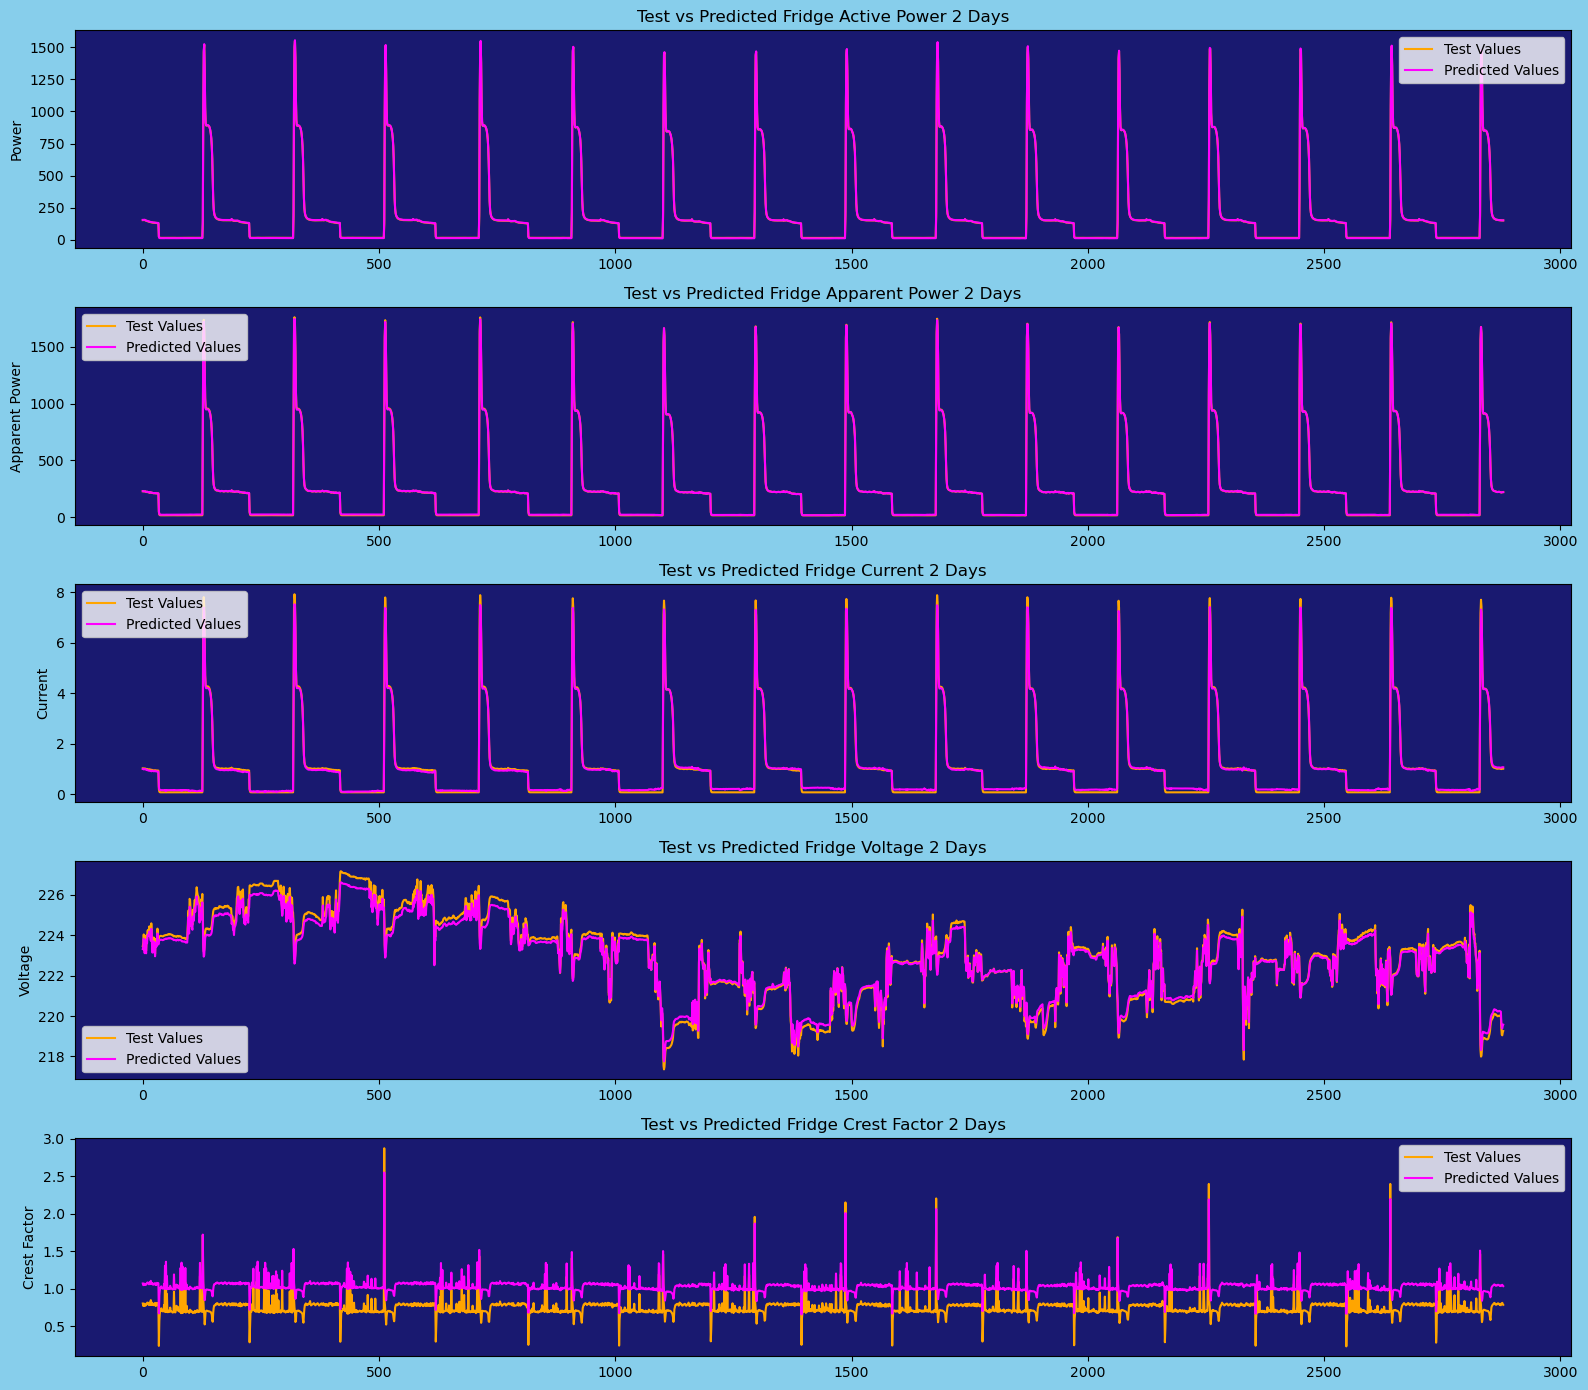

In [21]:
# now let us isolate the first two days of october from the test fridge to have a closer look. If 1 sample is approximately
# taken every minute, here we would need about 2880 entries





# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Fridge Active Power 2 Days')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Fridge Apparent Power 2 Days')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Fridge Current 2 Days')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Fridge Voltage 2 Days')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Fridge Crest Factor 2 Days')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


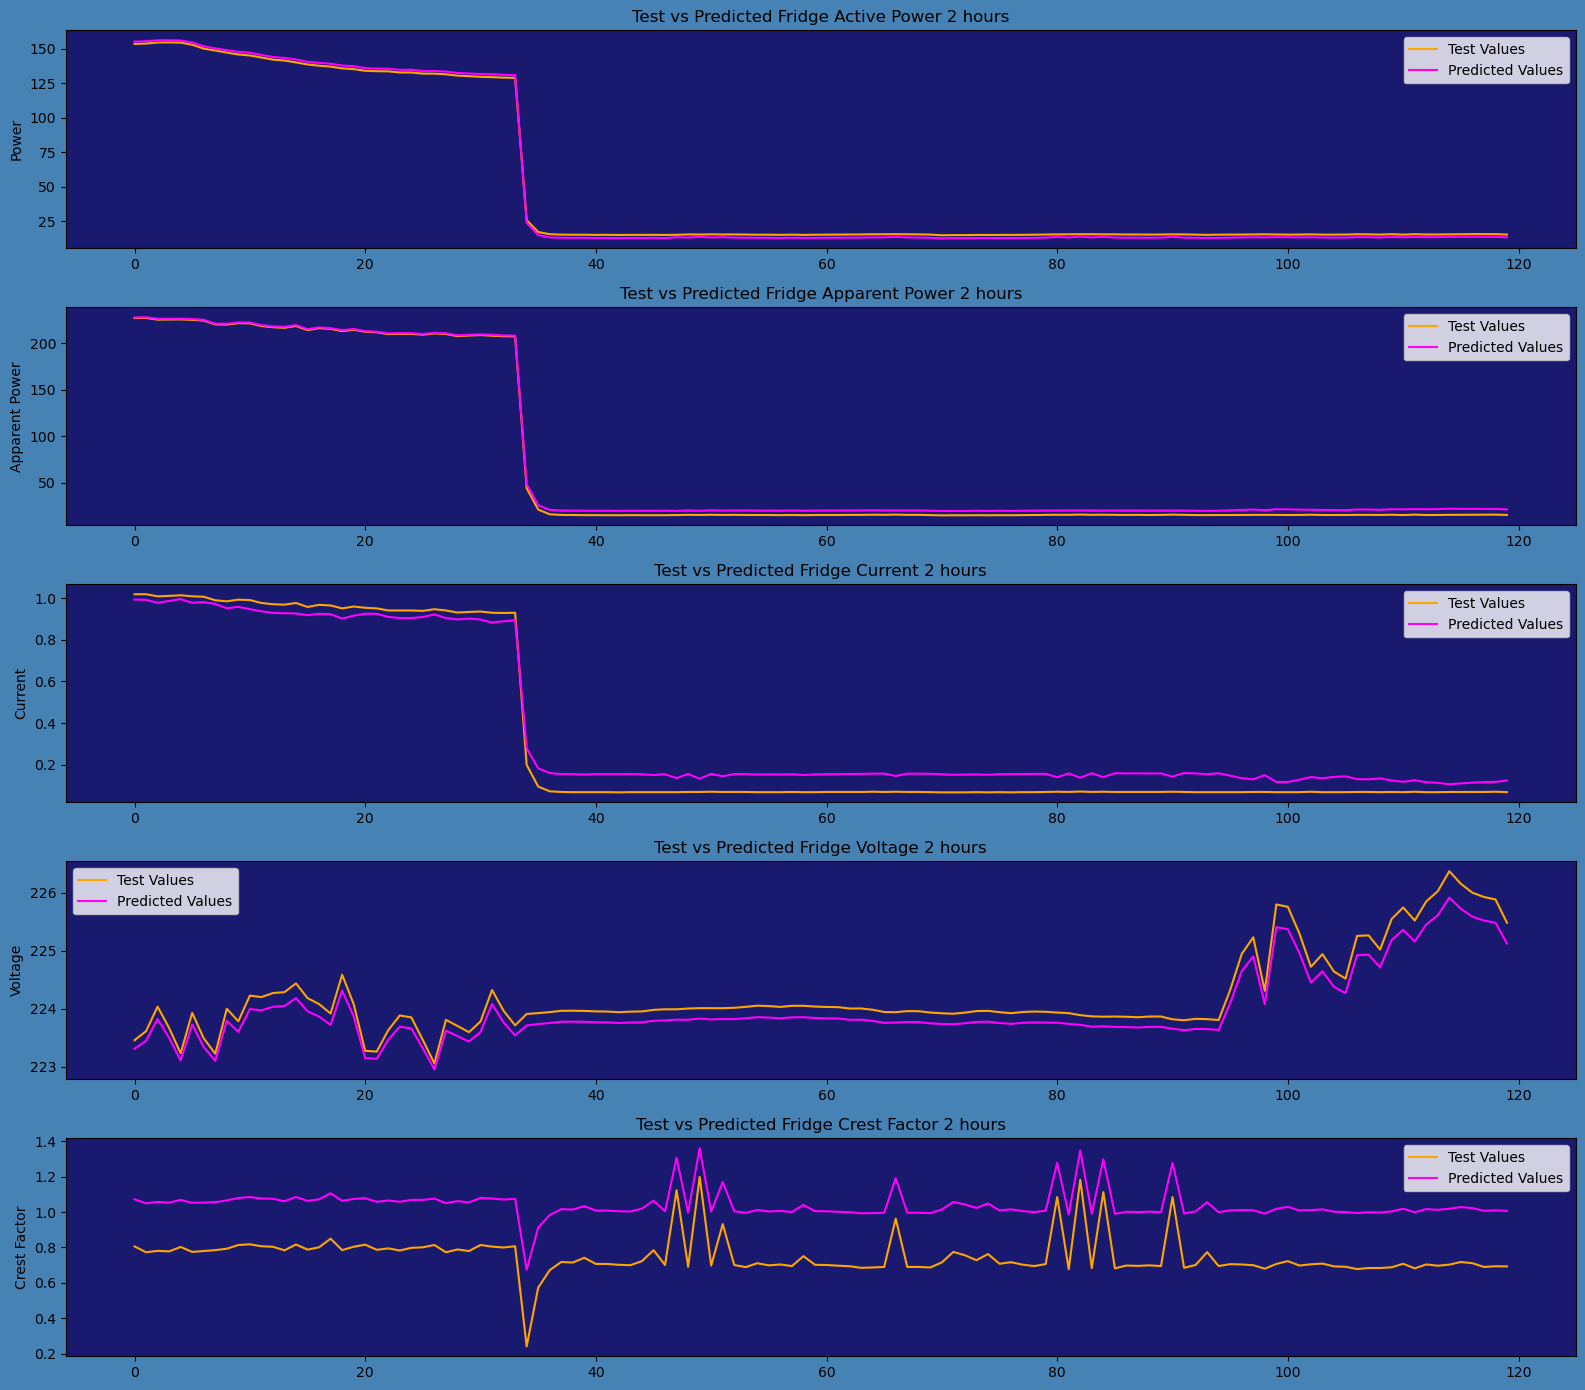

In [22]:
# and let us see for the first two hours 120 entries approximately
# now let us isolate the first two days of october from the test fridge to have a closer look. If 1 sample is approximately
# taken every minute, here we would need about 120 entries





# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('steelblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Fridge Active Power 2 hours')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Fridge Apparent Power 2 hours')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Fridge Current 2 hours')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Fridge Voltage 2 hours')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Fridge Crest Factor 2 hours')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [23]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the washing machine device
input_cols_washing_machine = aggregated_train.columns  # Adjust this according to your dataset
output_cols_washing_machine = washing_machine_test.columns  # Adjust this according to your dataset

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_washing_machine, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create the pipeline with assembler and scaler
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_washing_machine:
    # Create a new LinearRegression model with the corresponding label column
    lr = LinearRegression(featuresCol='scaled_features', labelCol=output_col, maxIter=100, regParam=0.2)
    
    # Add the LinearRegression model to the existing pipeline stages
    pipeline_stage_with_lr = pipeline.getStages() + [lr]
    
    # Create a new pipeline with the updated stages
    pipeline_with_lr = Pipeline(stages=pipeline_stage_with_lr)
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline_with_lr.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on washing_machine_test dataset
    predictions = pipeline_model.transform(washing_machine_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol=output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 2.043598232097263
MSE: 4.176293734231058
MAE: 1.8597078412801449
R2: 0.9999922740968403

Metrics for apwrA:
RMSE: 4.33553310288012
MSE: 18.796847286169324
MAE: 3.7997210728988895
R2: 0.9999652477377968

Metrics for curA:
RMSE: 0.09226272547207247
MSE: 0.00851241051153501
MAE: 0.08379078566087213
R2: 0.9992491307531333

Metrics for vltA:
RMSE: 0.20420141581560125
MSE: 0.04169821822109608
MAE: 0.1610967169158506
R2: 0.9913046452333407

Metrics for screA:
RMSE: 0.20842811533888533
MSE: 0.043442279263719685
MAE: 0.18833363138102402
R2: 0.6344876523012561



In [24]:
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

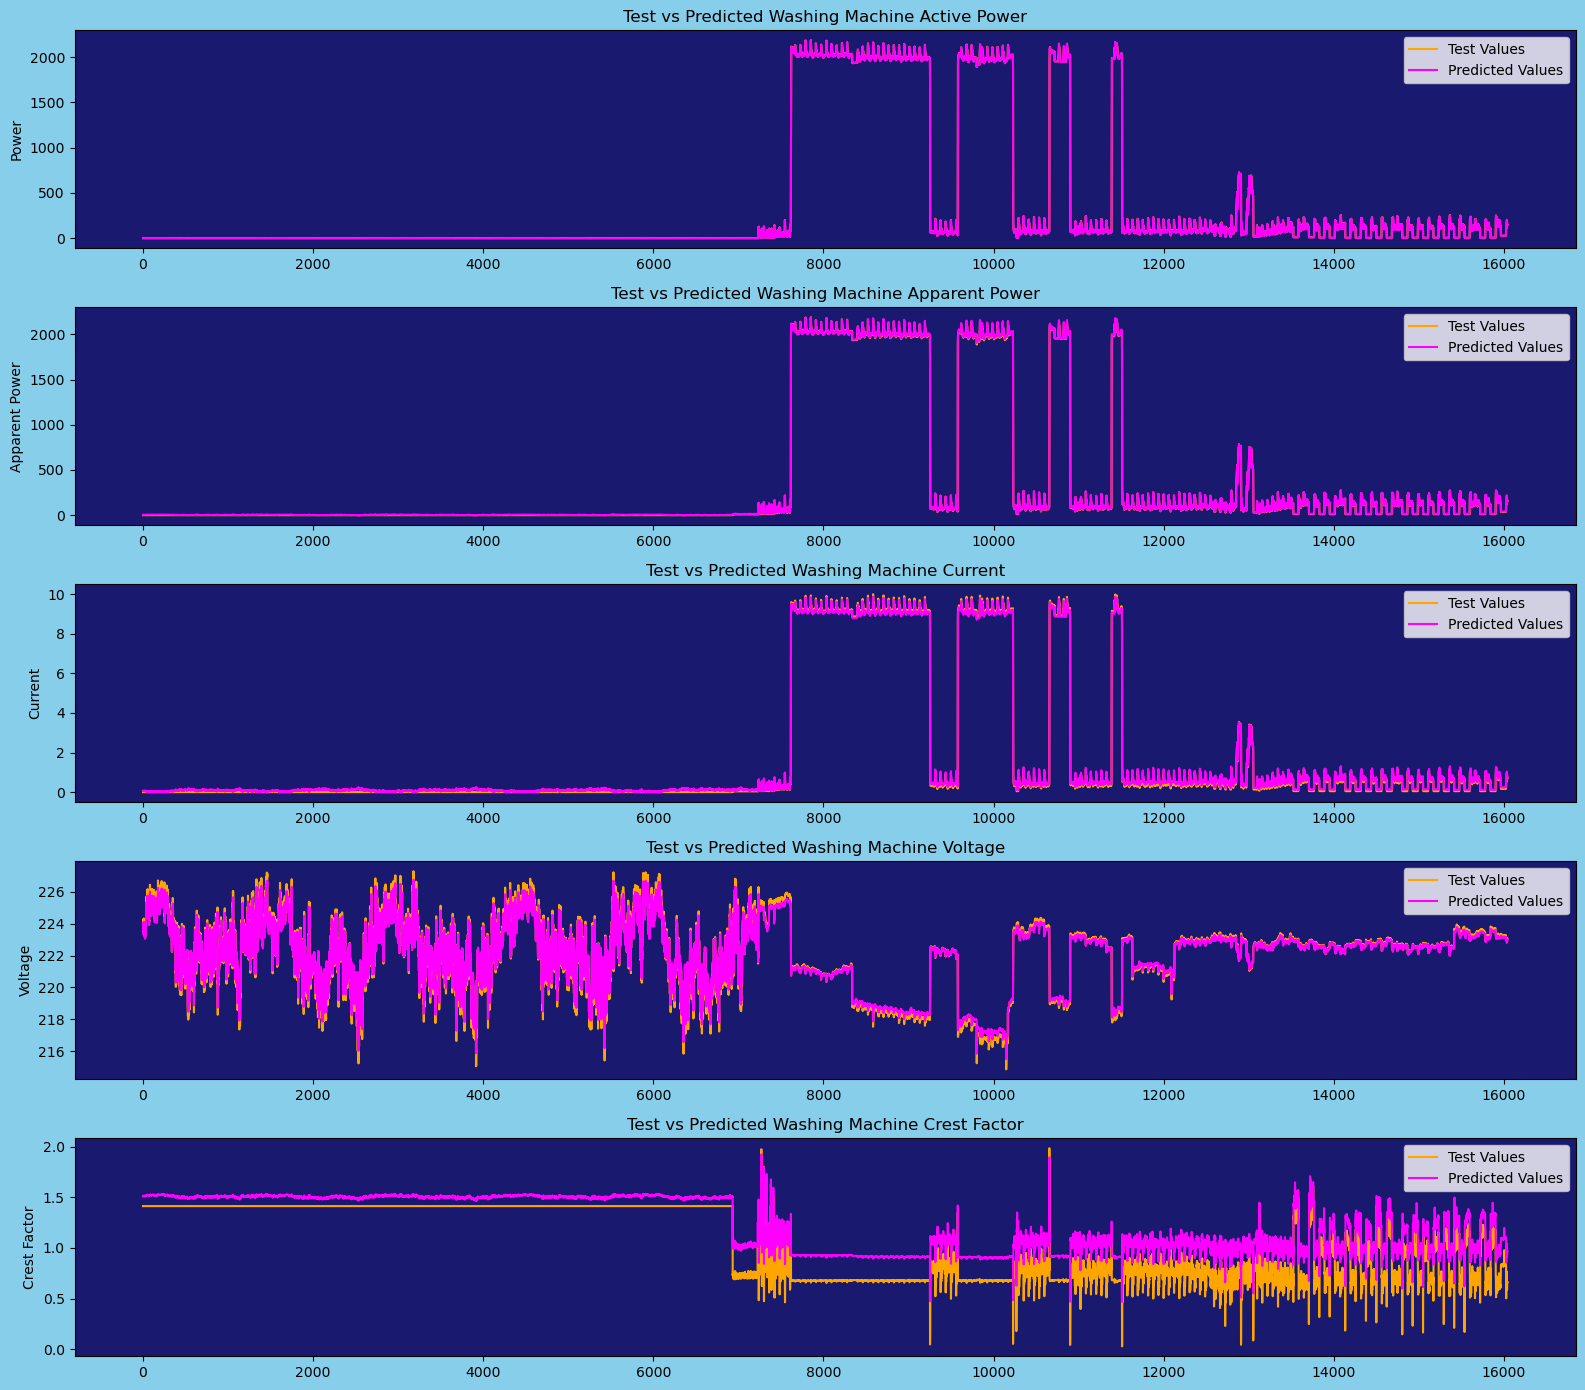

In [25]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Washing Machine Active Power')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Washing Machine Apparent Power')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Washing Machine Current')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Washing Machine Voltage')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Washing Machine Crest Factor')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


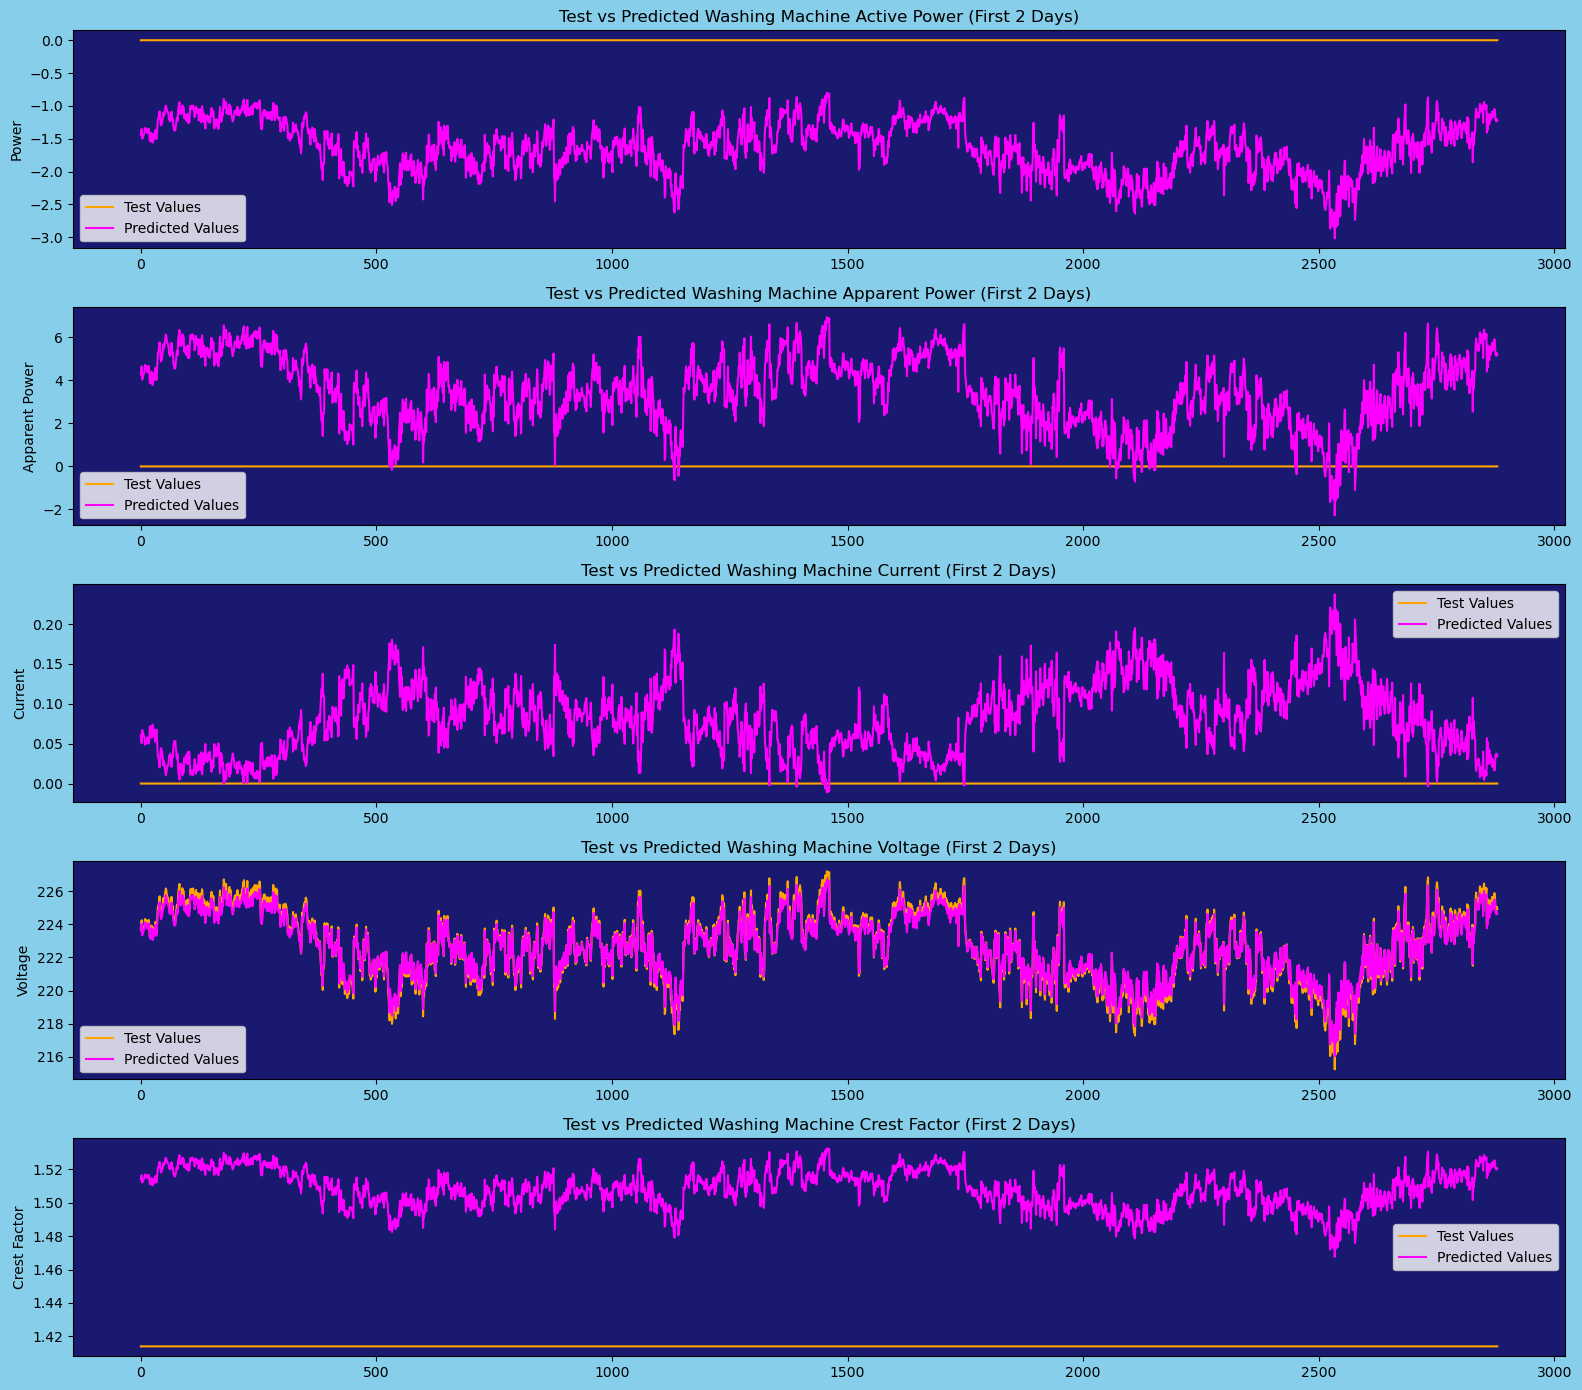

In [26]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two days
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Washing Machine Active Power (First 2 Days)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Washing Machine Apparent Power (First 2 Days)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Washing Machine Current (First 2 Days)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Washing Machine Voltage (First 2 Days)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Washing Machine Crest Factor (First 2 Days)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


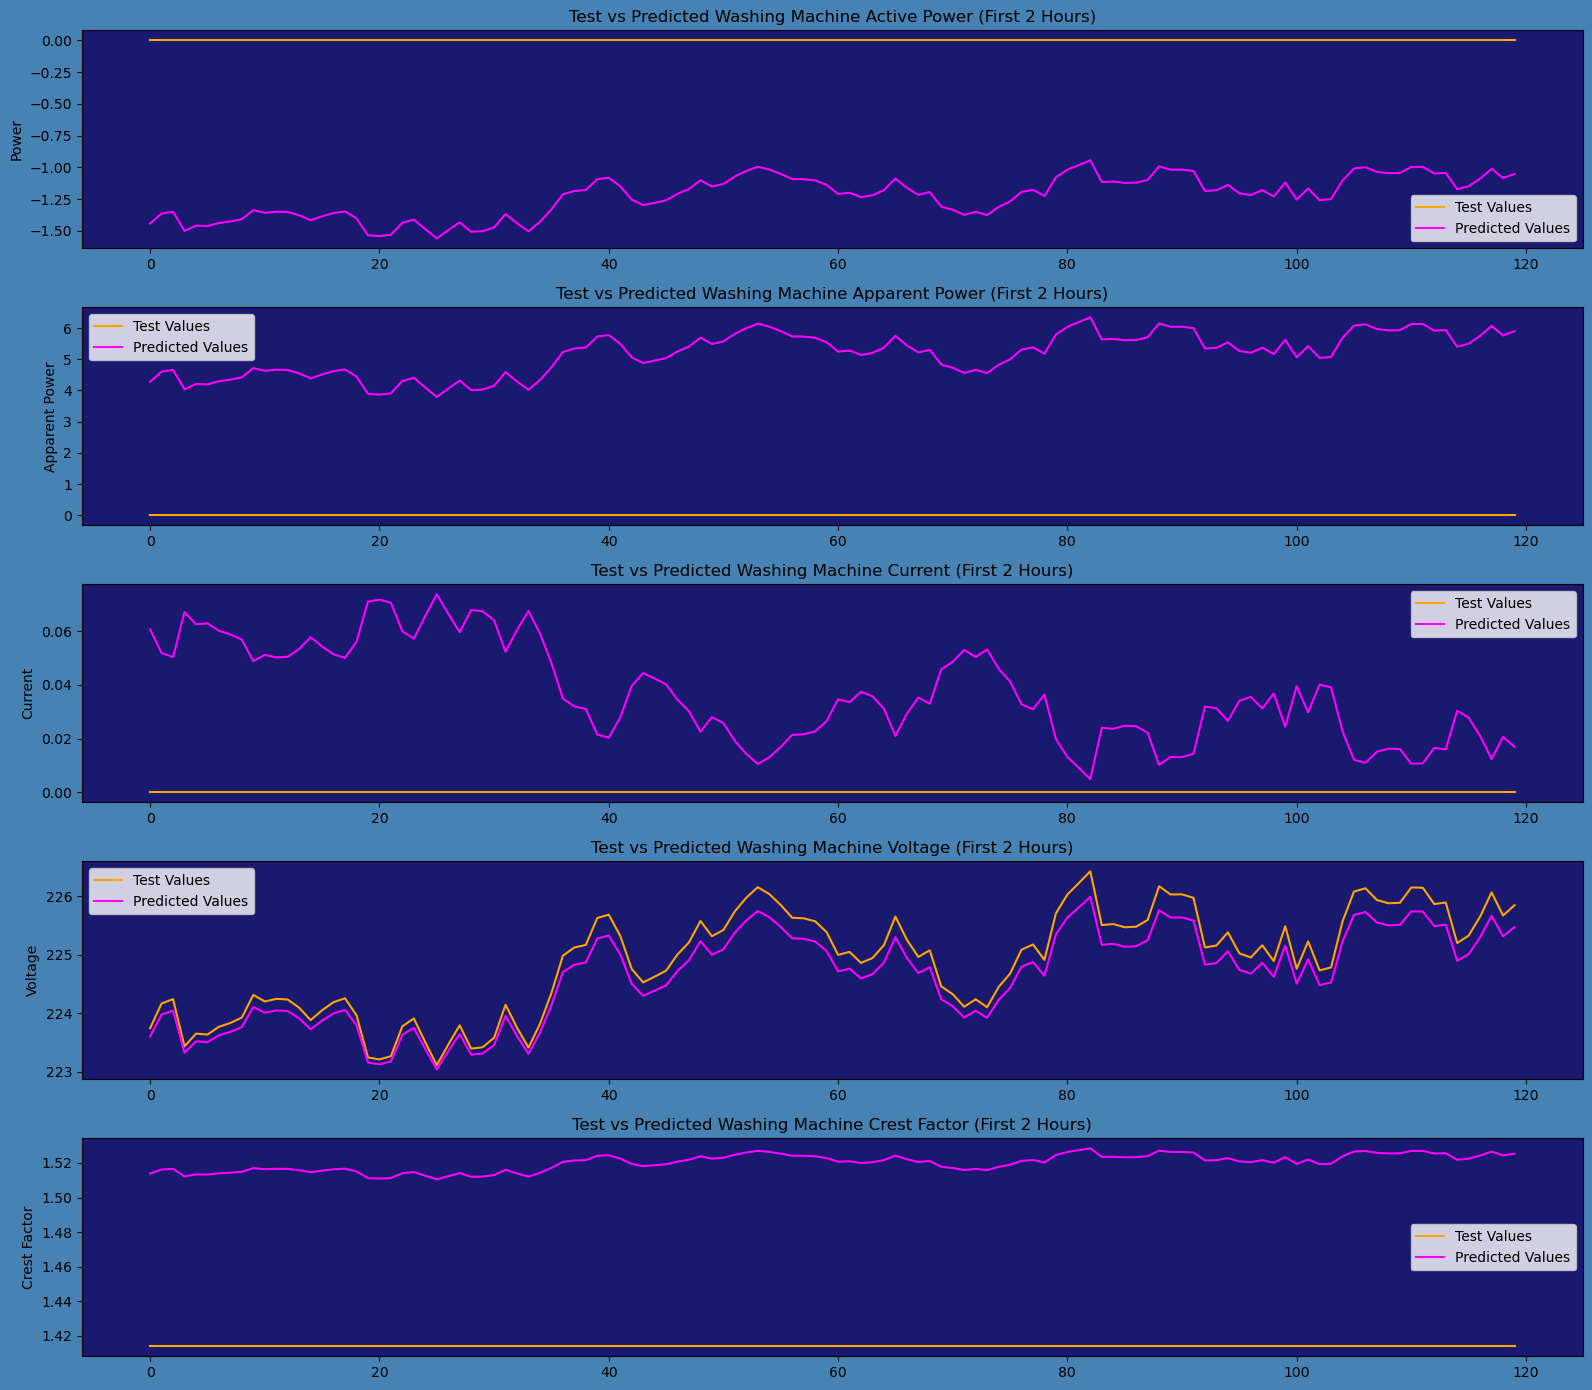

In [27]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('steelblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two hours
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Washing Machine Active Power (First 2 Hours)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Washing Machine Apparent Power (First 2 Hours)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Washing Machine Current (First 2 Hours)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Washing Machine Voltage (First 2 Hours)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Washing Machine Crest Factor (First 2 Hours)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [28]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the microwave device
input_cols_microwave = aggregated_train.columns  # Adjust this according to your dataset
output_cols_microwave = microwave_test.columns  # Adjust this according to your dataset

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_microwave, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create the pipeline with assembler and scaler
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_microwave:
    # Create a new LinearRegression model with the corresponding label column
    lr = LinearRegression(featuresCol='scaled_features', labelCol=output_col, maxIter=100, regParam=0.2)
    
    # Add the LinearRegression model to the existing pipeline stages
    pipeline_stage_with_lr = pipeline.getStages() + [lr]
    
    # Create a new pipeline with the updated stages
    pipeline_with_lr = Pipeline(stages=pipeline_stage_with_lr)
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline_with_lr.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on microwave_test dataset
    predictions = pipeline_model.transform(microwave_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol=output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 8.720755481525096
MSE: 76.05157616855
MAE: 5.153366007986745
R2: 0.9993610457093378

Metrics for apwrA:
RMSE: 6.6666007219404815
MSE: 44.443565185777345
MAE: 5.513761423864605
R2: 0.9997314742202662

Metrics for curA:
RMSE: 0.24854326396949472
MSE: 0.061773754064609936
MAE: 0.1705960788928307
R2: 0.9816327259295341

Metrics for vltA:
RMSE: 0.2836428770268154
MSE: 0.08045328168804913
MAE: 0.2431670394971743
R2: 0.9857375439260192

Metrics for screA:
RMSE: 0.26463184163430487
MSE: 0.07003001160676381
MAE: 0.26018802597225305
R2: -1.4830789426524382



In [29]:
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

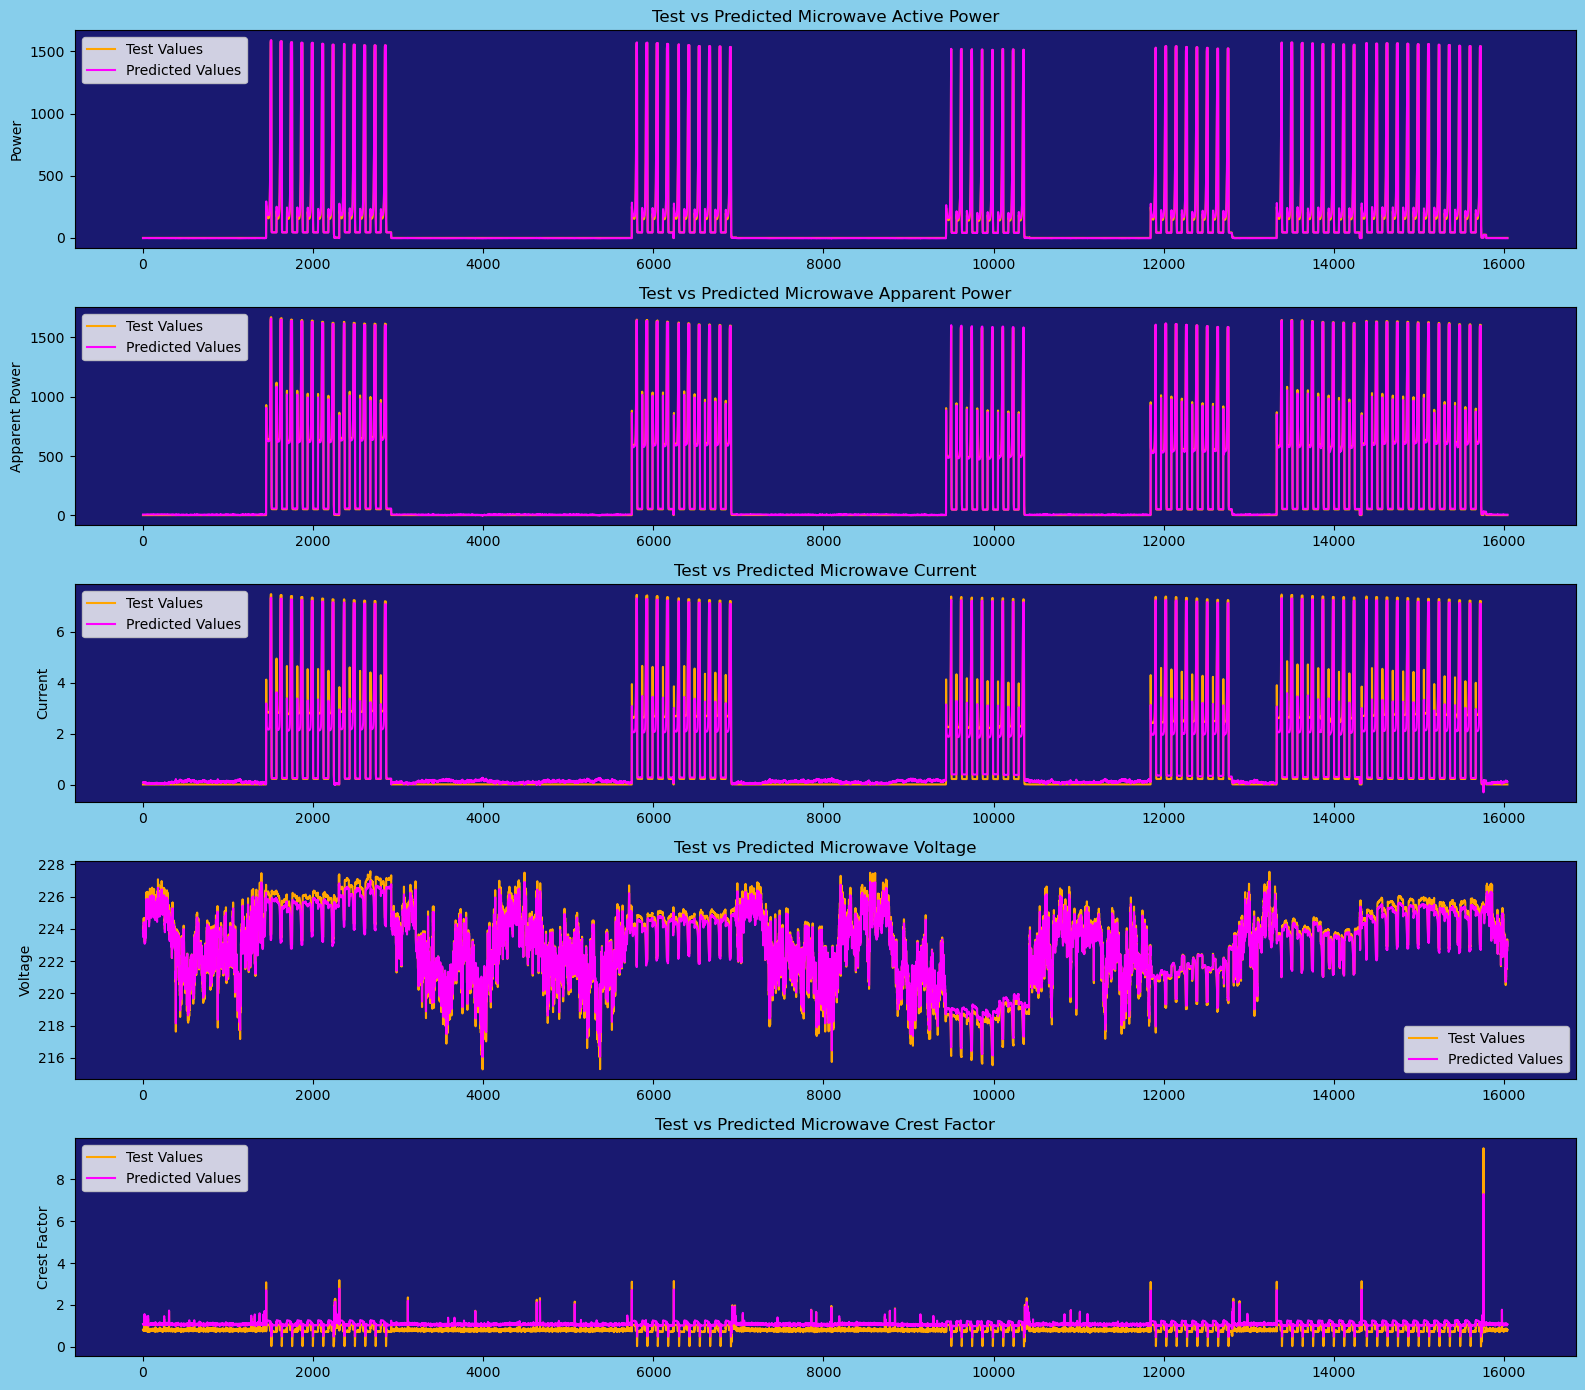

In [30]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Microwave Active Power')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Microwave Apparent Power')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Microwave Current')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Microwave Voltage')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Microwave Crest Factor')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


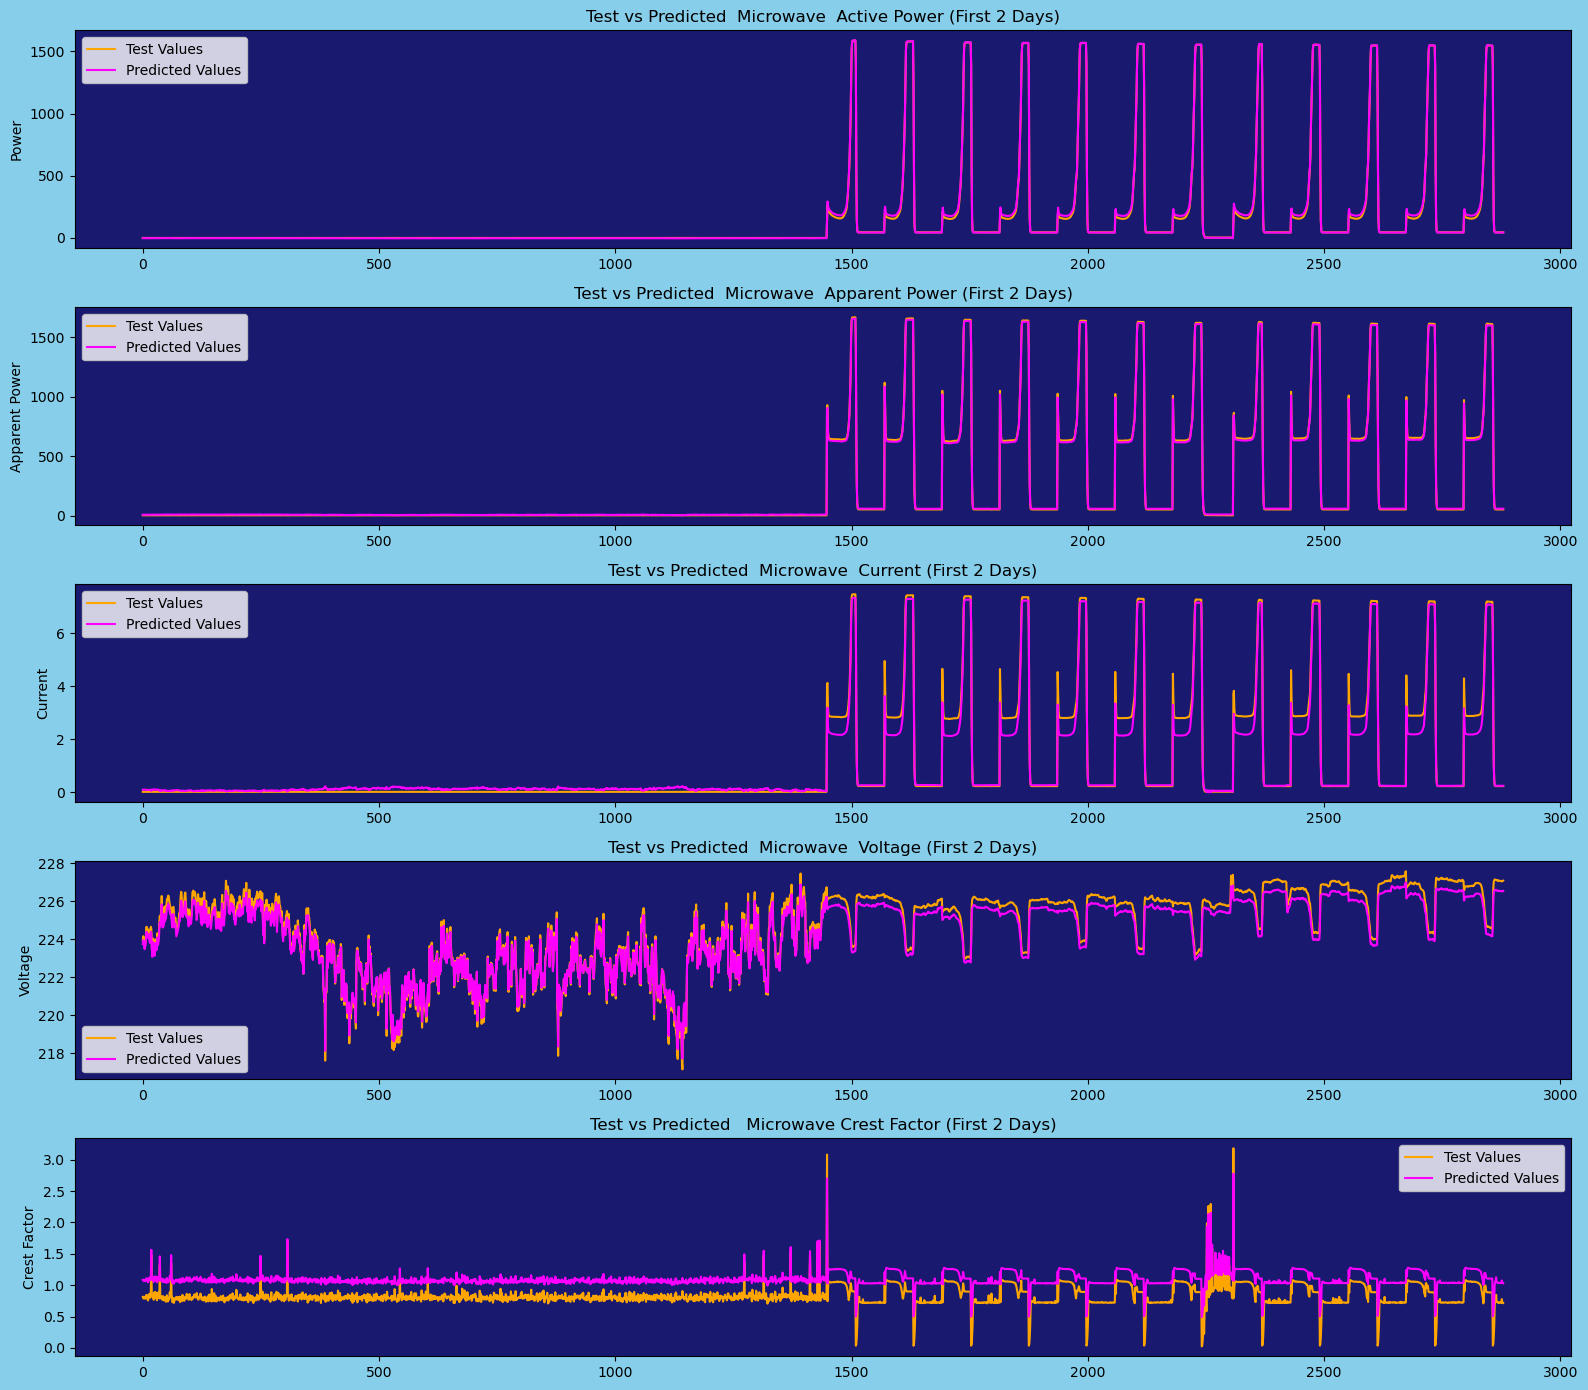

In [31]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two days
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted  Microwave  Active Power (First 2 Days)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted  Microwave  Apparent Power (First 2 Days)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted  Microwave  Current (First 2 Days)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted  Microwave  Voltage (First 2 Days)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted   Microwave Crest Factor (First 2 Days)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


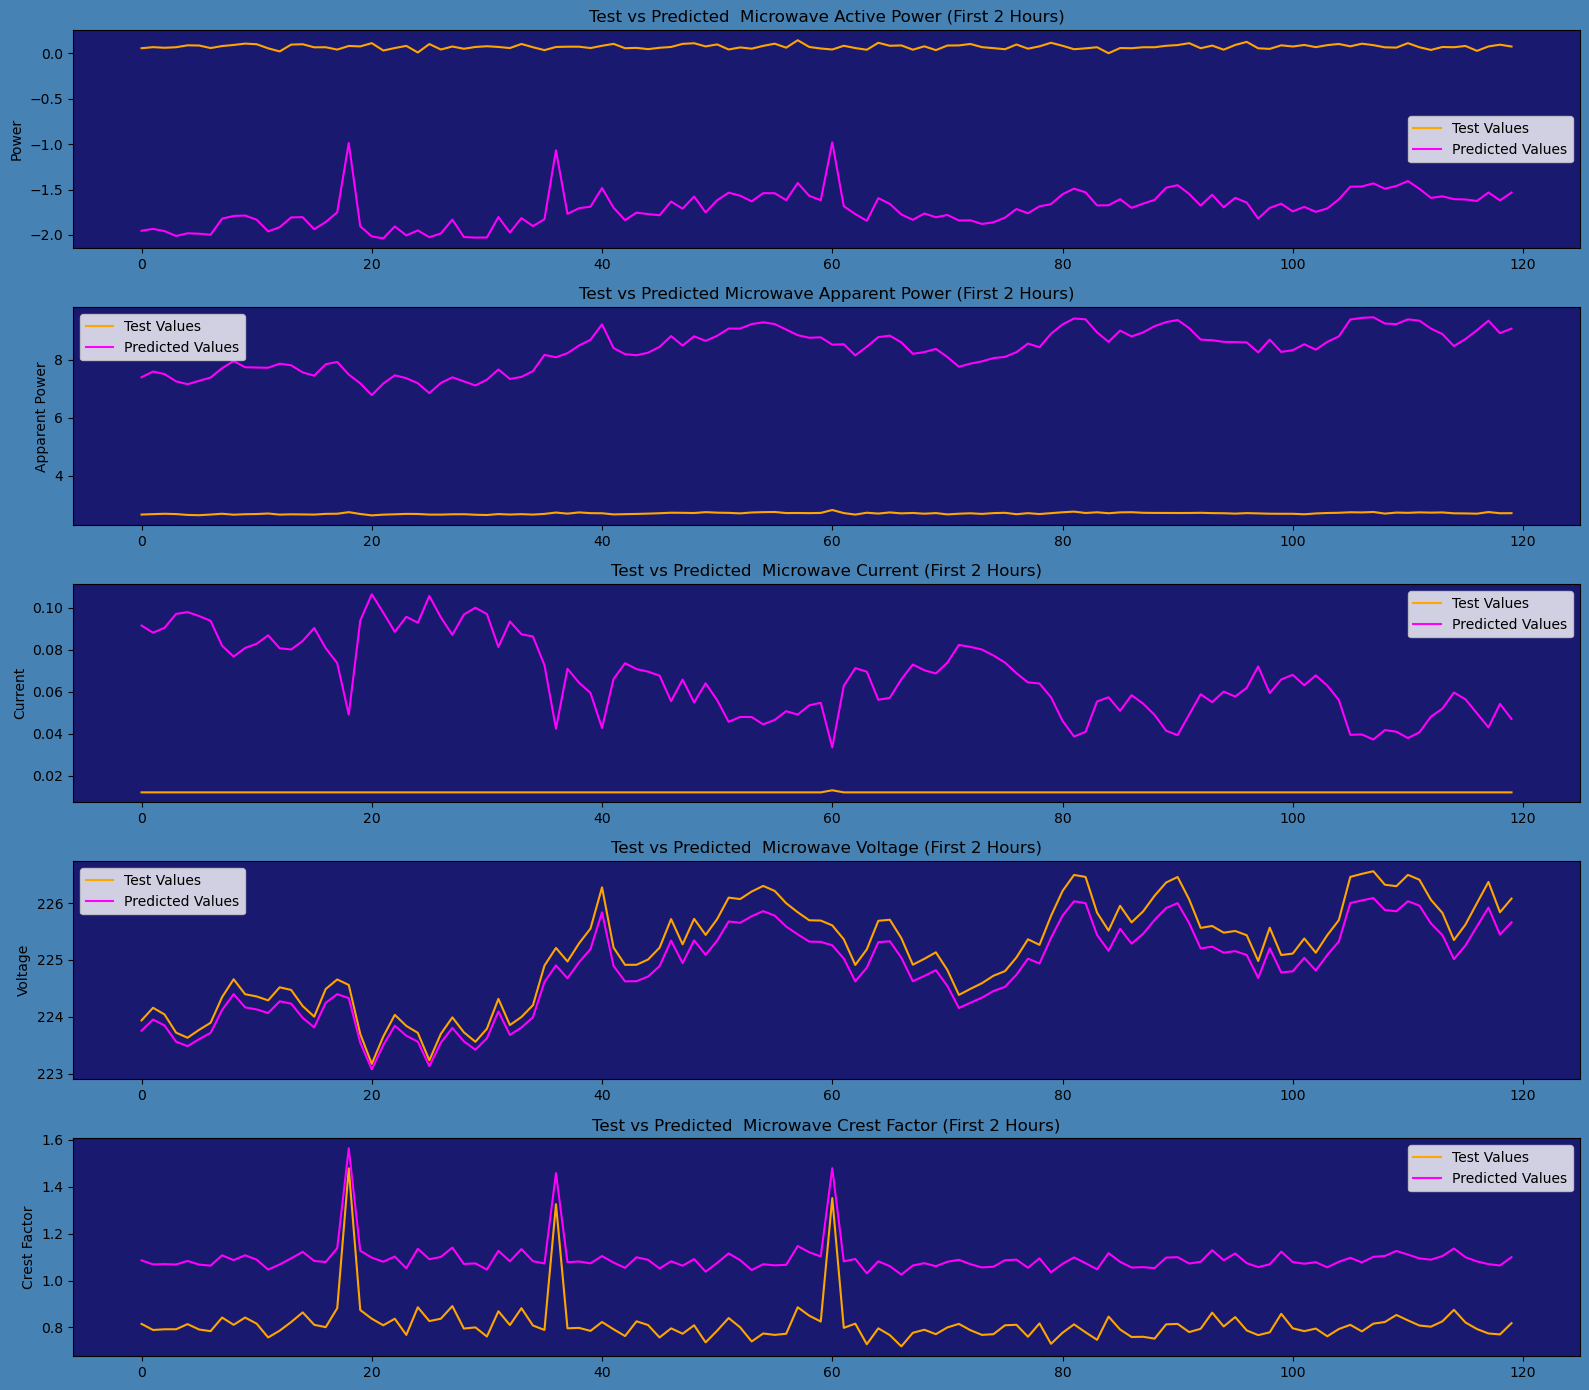

In [32]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('steelblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two hours
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted  Microwave Active Power (First 2 Hours)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Microwave Apparent Power (First 2 Hours)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted  Microwave Current (First 2 Hours)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted  Microwave Voltage (First 2 Hours)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted  Microwave Crest Factor (First 2 Hours)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [33]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the dishwasher device
input_cols_dishwasher = aggregated_train.columns  # Adjust this according to your dataset
output_cols_dishwasher = dishwasher_test.columns  # Adjust this according to your dataset

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_dishwasher, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create the pipeline with assembler and scaler
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_dishwasher:
    # Create a new LinearRegression model with the corresponding label column
    lr = LinearRegression(featuresCol='scaled_features', labelCol=output_col, maxIter=100, regParam=0.2)
    
    # Add the LinearRegression model to the existing pipeline stages
    pipeline_stage_with_lr = pipeline.getStages() + [lr]
    
    # Create a new pipeline with the updated stages
    pipeline_with_lr = Pipeline(stages=pipeline_stage_with_lr)
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline_with_lr.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on dishwasher_test dataset
    predictions = pipeline_model.transform(dishwasher_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol=output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 2.4191302051914745
MSE: 5.852190949669745
MAE: 2.100911674872163
R2: 0.9999420880761143

Metrics for apwrA:
RMSE: 4.1056255212325805
MSE: 16.856160920596295
MAE: 3.5832757683485164
R2: 0.9998351145291418

Metrics for curA:
RMSE: 0.11373660362881942
MSE: 0.01293601500501918
MAE: 0.10072177398247359
R2: 0.9940156686247913

Metrics for vltA:
RMSE: 0.23523274085158216
MSE: 0.05533444236854761
MAE: 0.19413066107510635
R2: 0.9886144466284886

Metrics for screA:
RMSE: 0.2698135616442449
MSE: 0.07279935804715276
MAE: 0.25956375429161455
R2: 0.7009974208303537



In [34]:
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

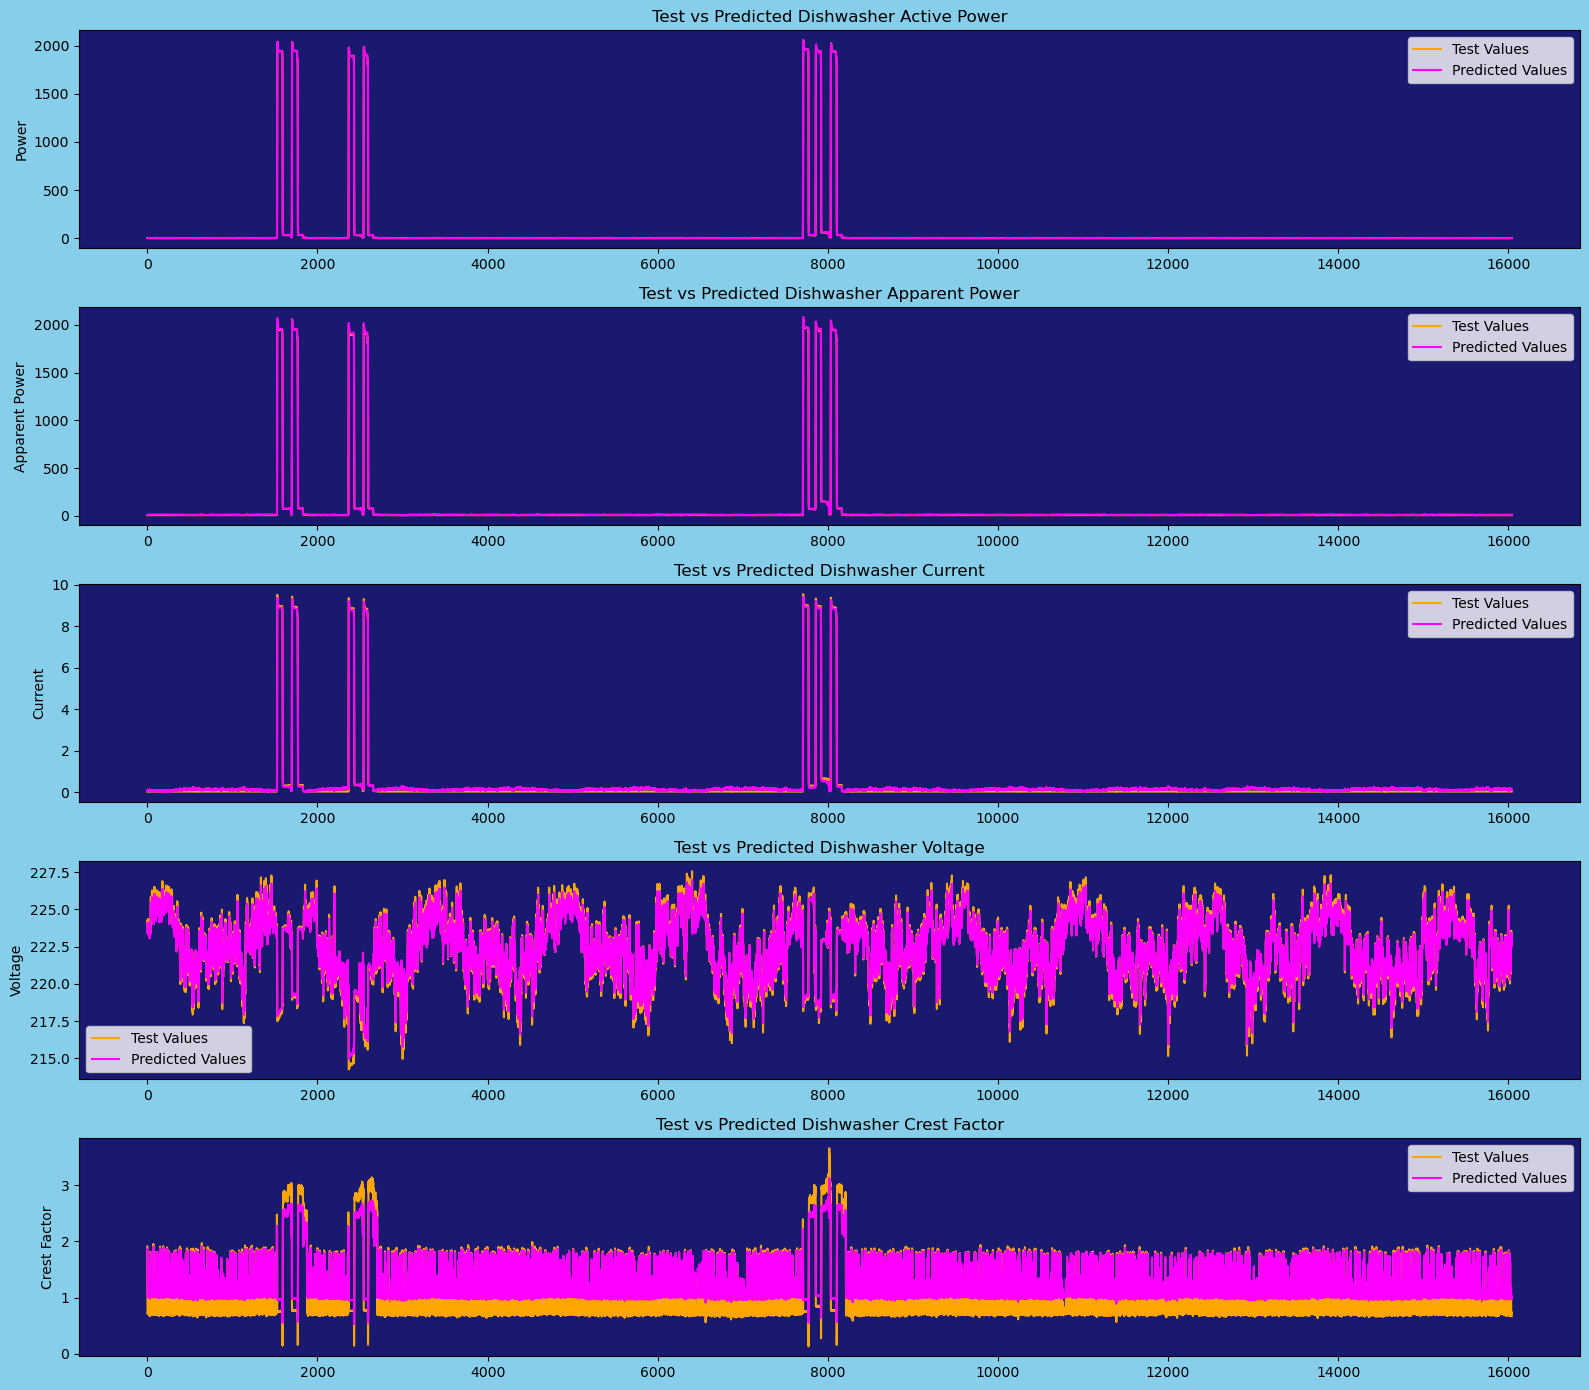

In [35]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Dishwasher Active Power')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Dishwasher Apparent Power')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Dishwasher Current')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Dishwasher Voltage')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Dishwasher Crest Factor')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


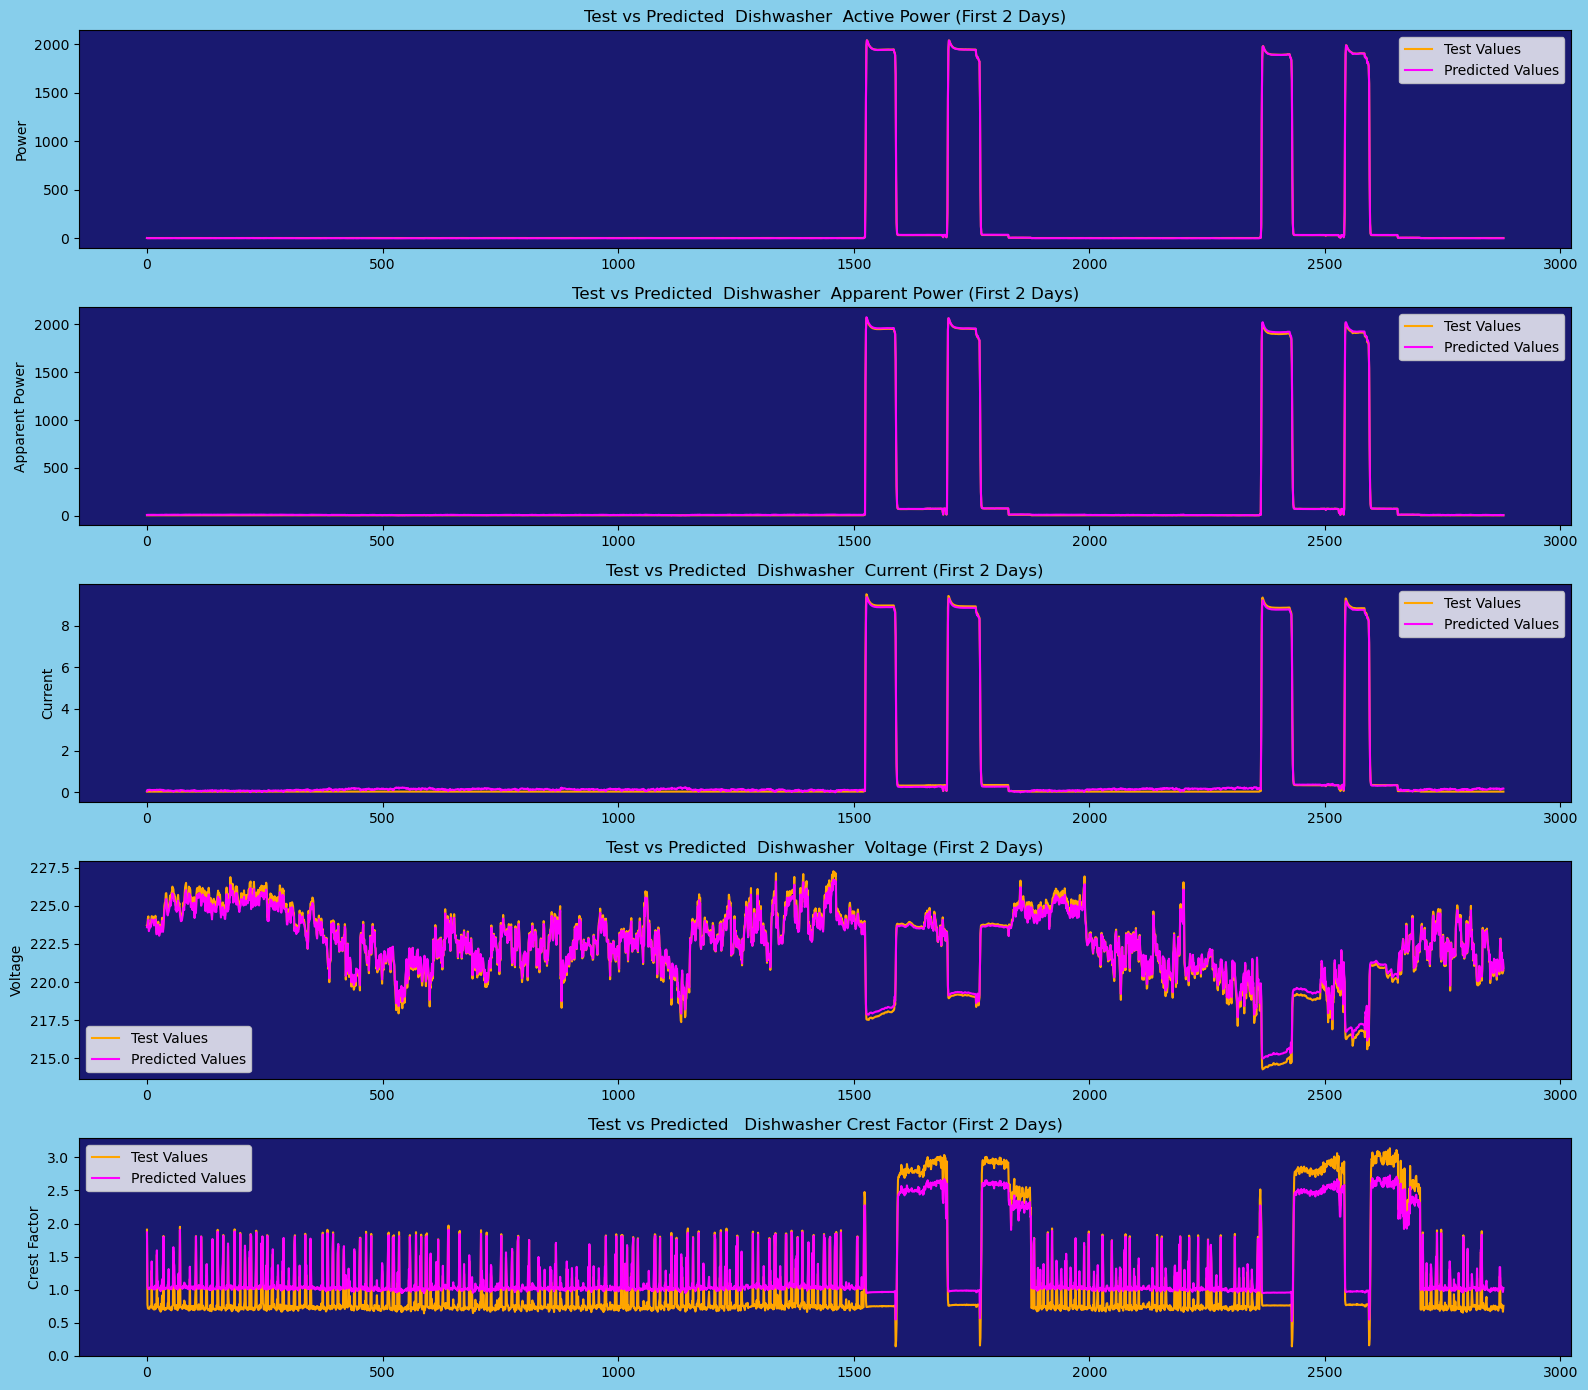

In [36]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two days
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted  Dishwasher  Active Power (First 2 Days)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted  Dishwasher  Apparent Power (First 2 Days)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted  Dishwasher  Current (First 2 Days)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted  Dishwasher  Voltage (First 2 Days)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted   Dishwasher Crest Factor (First 2 Days)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('steelblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two hours
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted  Dishwasher Active Power (First 2 Hours)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted  Dishwasher Apparent Power (First 2 Hours)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted  Dishwasher Current (First 2 Hours)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted  Dishwasher Voltage (First 2 Hours)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted  Dishwasher Crest Factor (First 2 Hours)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [37]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the hotplate device
input_cols_hotplate = aggregated_train.columns  # Adjust this according to your dataset
output_cols_hotplate = hotplate_test.columns  # Adjust this according to your dataset

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_hotplate, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create the pipeline with assembler and scaler
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_hotplate:
    # Create a new LinearRegression model with the corresponding label column
    lr = LinearRegression(featuresCol='scaled_features', labelCol=output_col, maxIter=100, regParam=0.2)
    
    # Add the LinearRegression model to the existing pipeline stages
    pipeline_stage_with_lr = pipeline.getStages() + [lr]
    
    # Create a new pipeline with the updated stages
    pipeline_with_lr = Pipeline(stages=pipeline_stage_with_lr)
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline_with_lr.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on hotplate_test dataset
    predictions = pipeline_model.transform(hotplate_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol=output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 1.7974274333950417
MSE: 3.230745378321087
MAE: 1.6841467430138242
R2: 0.9999169158661461

Metrics for apwrA:
RMSE: 3.797285211015118
MSE: 14.419374973794127
MAE: 3.4401743381969783
R2: 0.9996339114849067

Metrics for curA:
RMSE: 0.09354307288128338
MSE: 0.008750306484073095
MAE: 0.08195119344946675
R2: 0.9891468334914321

Metrics for vltA:
RMSE: 0.2301015068282818
MSE: 0.05294670344464581
MAE: 0.19090192219058238
R2: 0.987771015398305

Metrics for screA:
RMSE: 0.10943209894029192
MSE: 0.011975384278477838
MAE: 0.10164800419137787
R2: 0.492091054255263



In [38]:
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

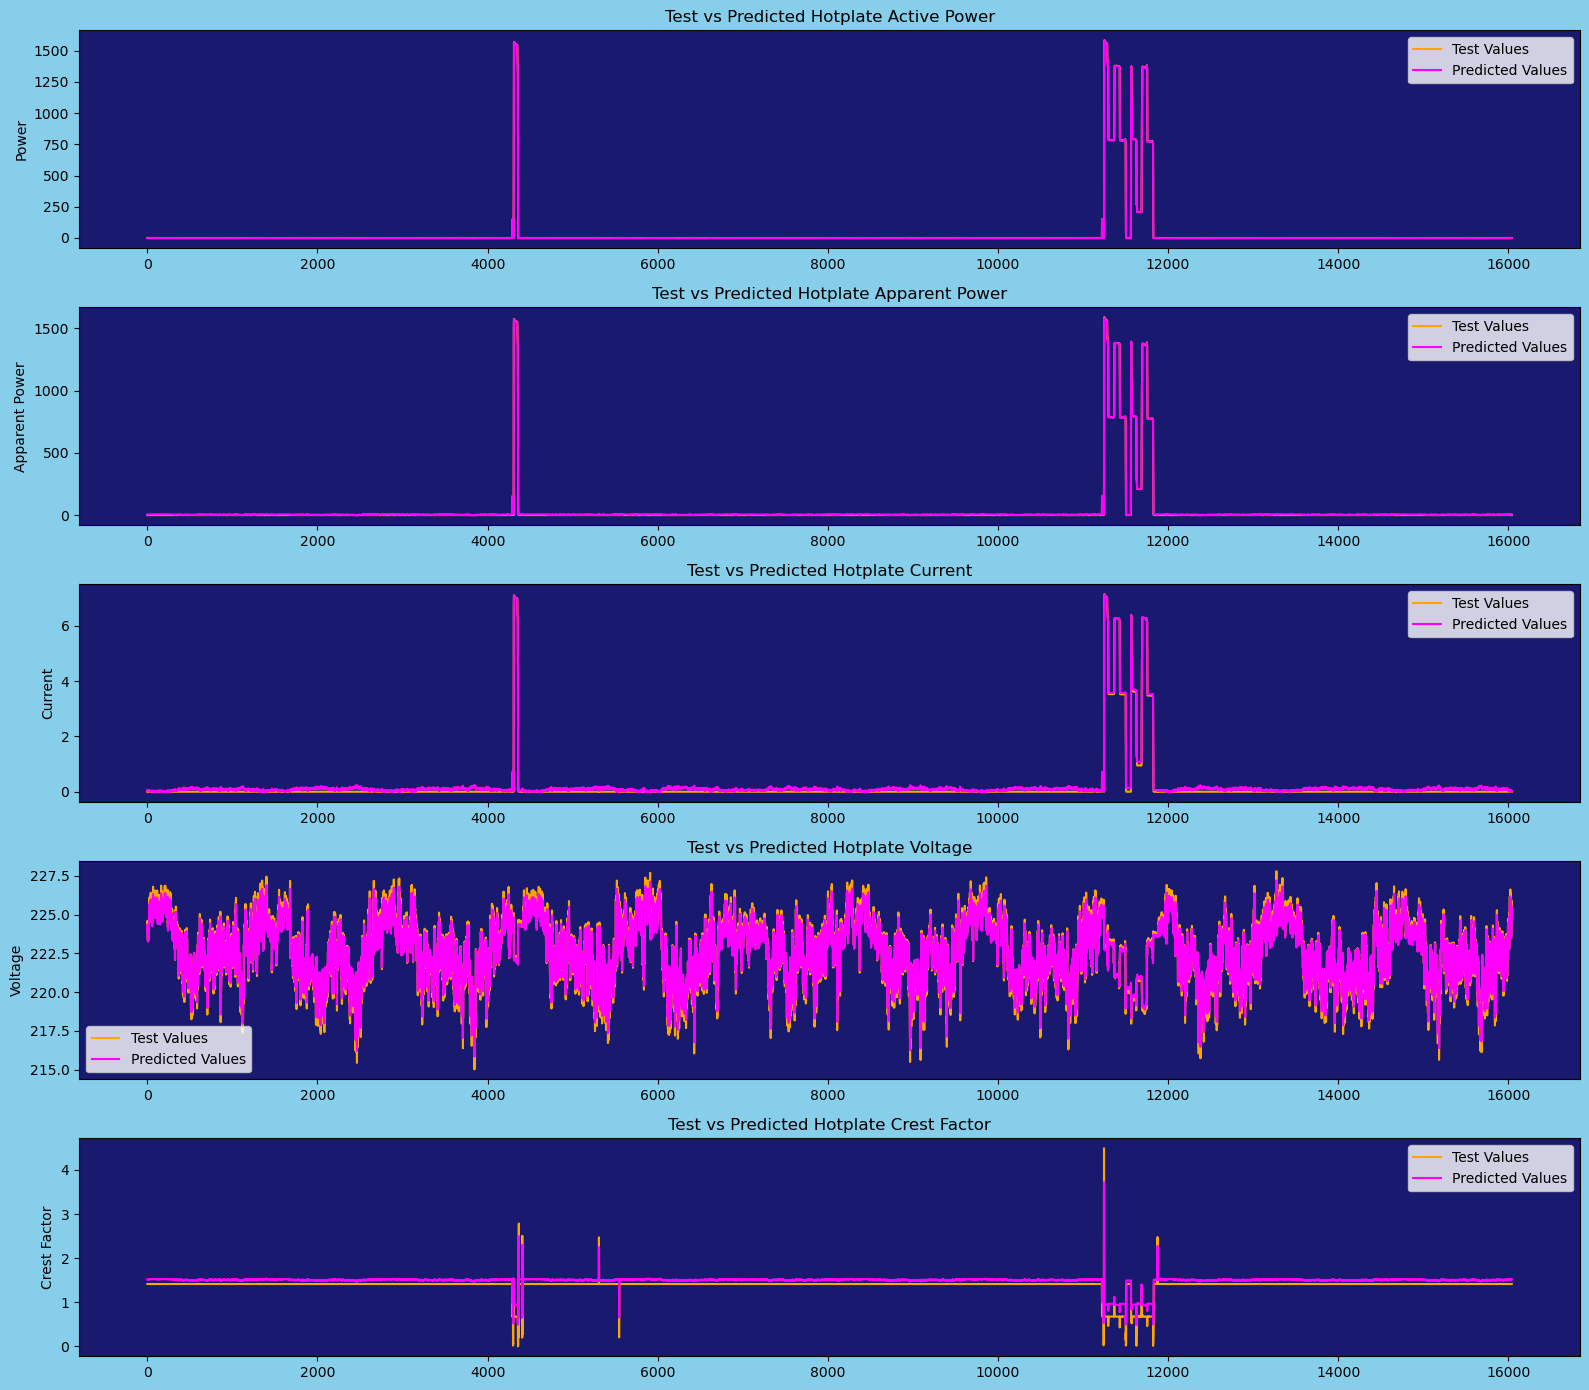

In [39]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Hotplate Active Power')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Hotplate Apparent Power')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Hotplate Current')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Hotplate Voltage')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Hotplate Crest Factor')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


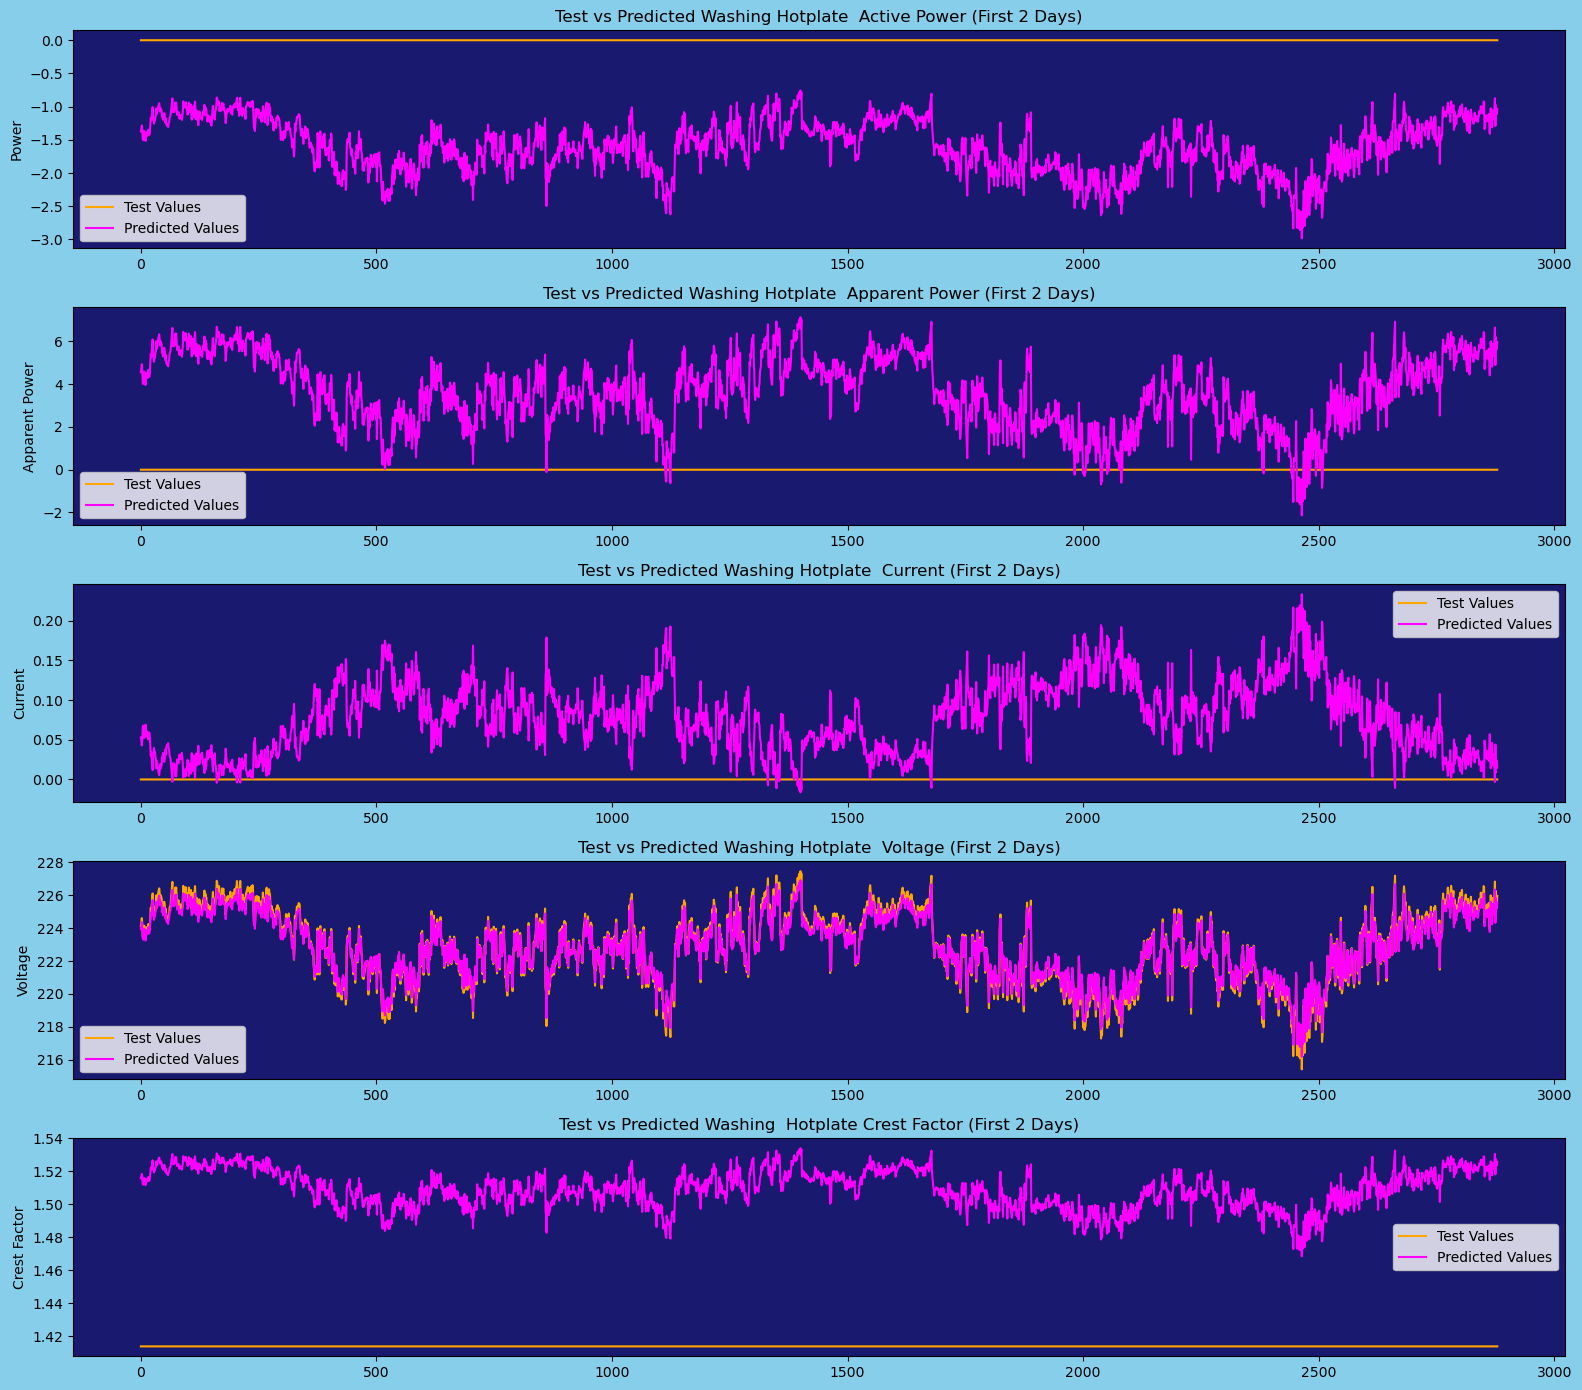

In [40]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two days
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Washing Hotplate  Active Power (First 2 Days)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Washing Hotplate  Apparent Power (First 2 Days)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Washing Hotplate  Current (First 2 Days)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Washing Hotplate  Voltage (First 2 Days)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Washing  Hotplate Crest Factor (First 2 Days)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


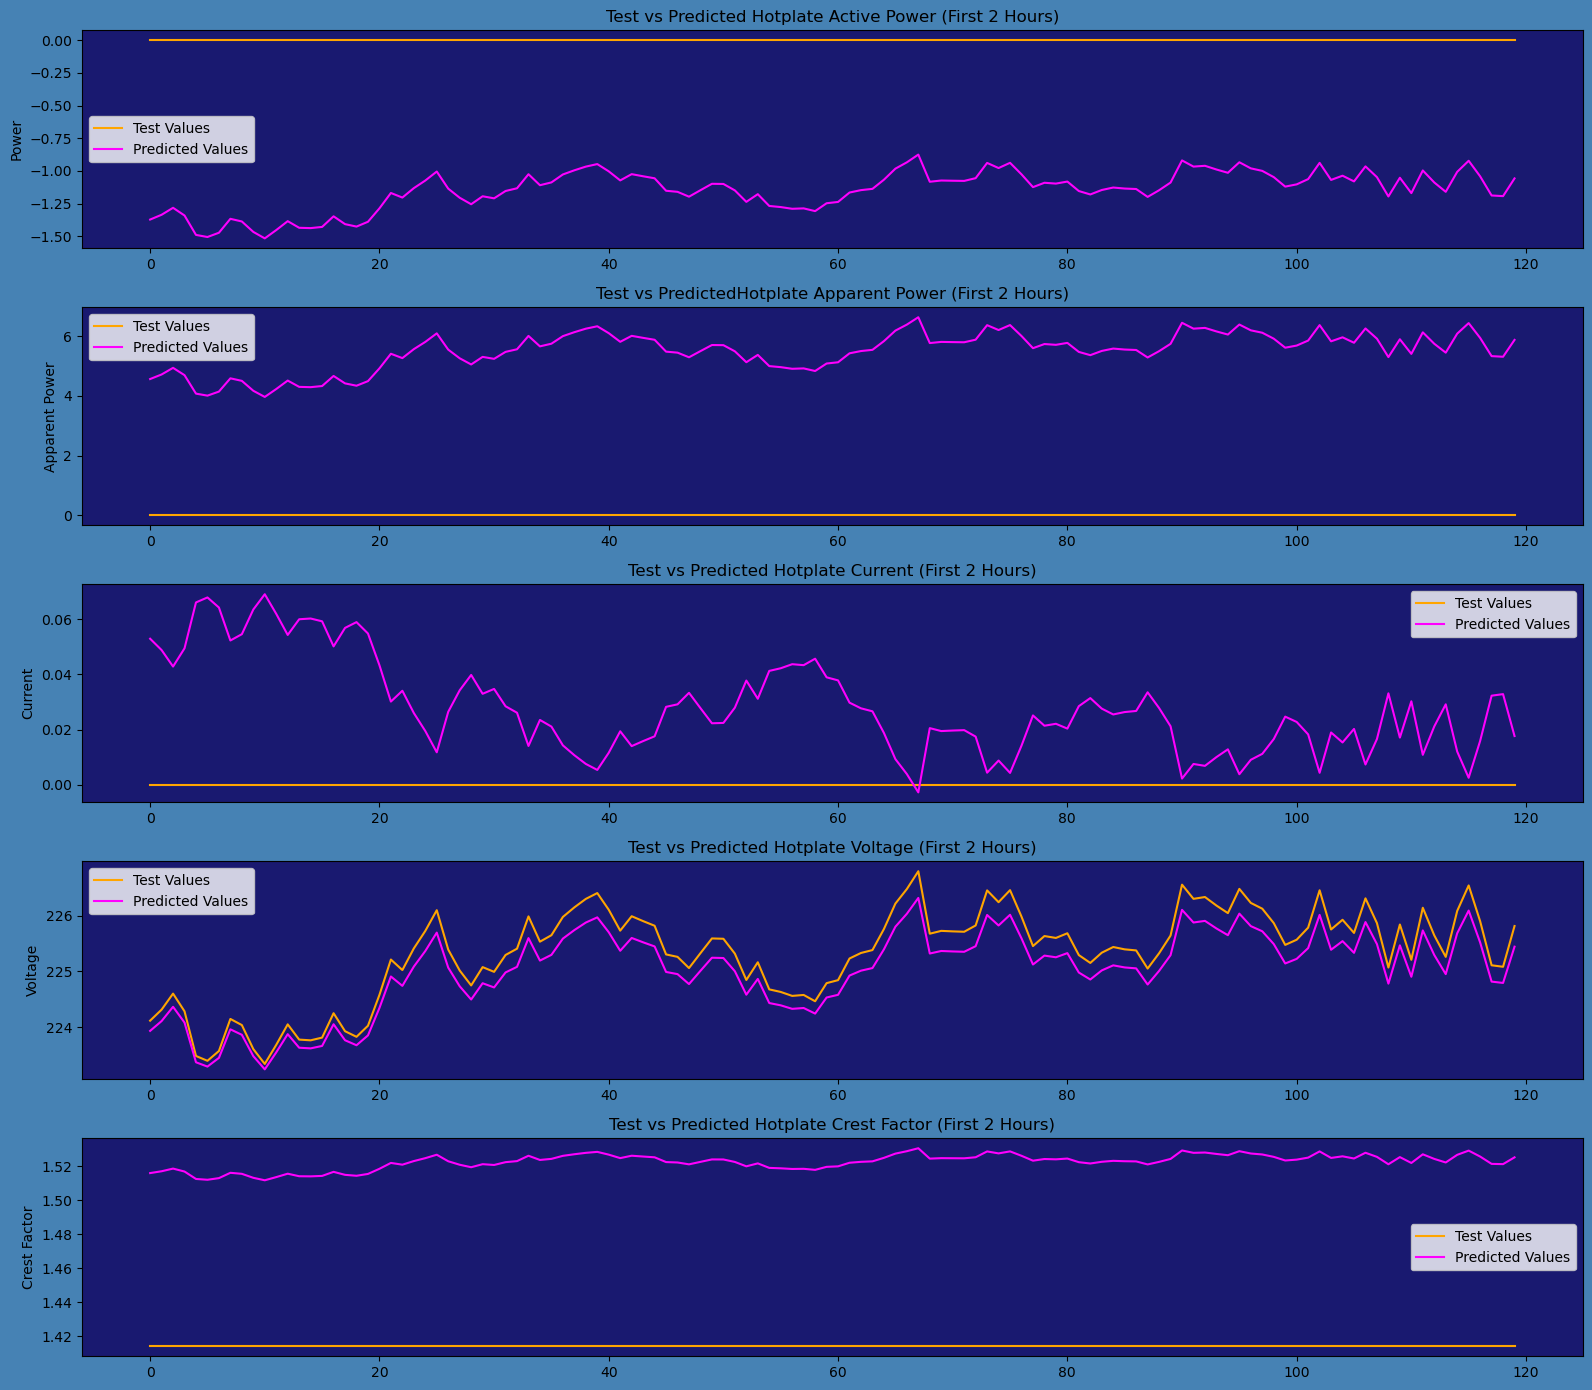

In [41]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('steelblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two hours
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Hotplate Active Power (First 2 Hours)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs PredictedHotplate Apparent Power (First 2 Hours)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Hotplate Current (First 2 Hours)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Hotplate Voltage (First 2 Hours)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Hotplate Crest Factor (First 2 Hours)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [11]:
water_heater_test = water_heater_test.withColumnRenamed("pwrC", "pwrA") \
                                     .withColumnRenamed("apwrC", "apwrA") \
                                     .withColumnRenamed("curC", "curA") \
                                     .withColumnRenamed('vltC', 'vltA') \
                                     .withColumnRenamed('screC', 'screA')


In [12]:
water_heater_train = water_heater_train.withColumnRenamed("pwrC", "pwrA") \
                                     .withColumnRenamed("apwrC", "apwrA") \
                                     .withColumnRenamed("curC", "curA") \
                                     .withColumnRenamed('vltC', 'vltA') \
                                     .withColumnRenamed('screC', 'screA')


In [13]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the water heater device
input_cols_water_heater = aggregated_train.columns  # Adjust this according to your dataset
output_cols_water_heater = ['pwrA', 'apwrA', 'curA', 'vltA', 'screA']  # Adjust this according to your dataset

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_water_heater, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create the pipeline with assembler and scaler
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_water_heater:
    # Create a new LinearRegression model with the corresponding label column
    lr = LinearRegression(featuresCol='scaled_features', labelCol=output_col, maxIter=100, regParam=0.2)
    
    # Add the LinearRegression model to the existing pipeline stages
    pipeline_stage_with_lr = pipeline.getStages() + [lr]
    
    # Create a new pipeline with the updated stages
    pipeline_with_lr = Pipeline(stages=pipeline_stage_with_lr)
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline_with_lr.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on water_heater_test dataset
    predictions = pipeline_model.transform(water_heater_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol=output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 0.7577699062997645
MSE: 0.5742152308935539
MAE: 0.5957694089454811
R2: -10.822207931896097

Metrics for apwrA:
RMSE: 4.043164157270175
MSE: 16.347176402634243
MAE: 3.8022273581932304
R2: -841.5215901744874

Metrics for curA:
RMSE: 0.043900055305068186
MSE: 0.0019272148557880455
MAE: 0.03586582967045639
R2: -5102.864902789815

Metrics for vltA:
RMSE: 0.26884675393200863
MSE: 0.07227857709977799
MAE: 0.2287889868695308
R2: 0.9781802951449469

Metrics for screA:
RMSE: 0.2195714308775522
MSE: 0.04821161325761569
MAE: 0.18065582105447253
R2: 0.7957047763482203



In [14]:
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

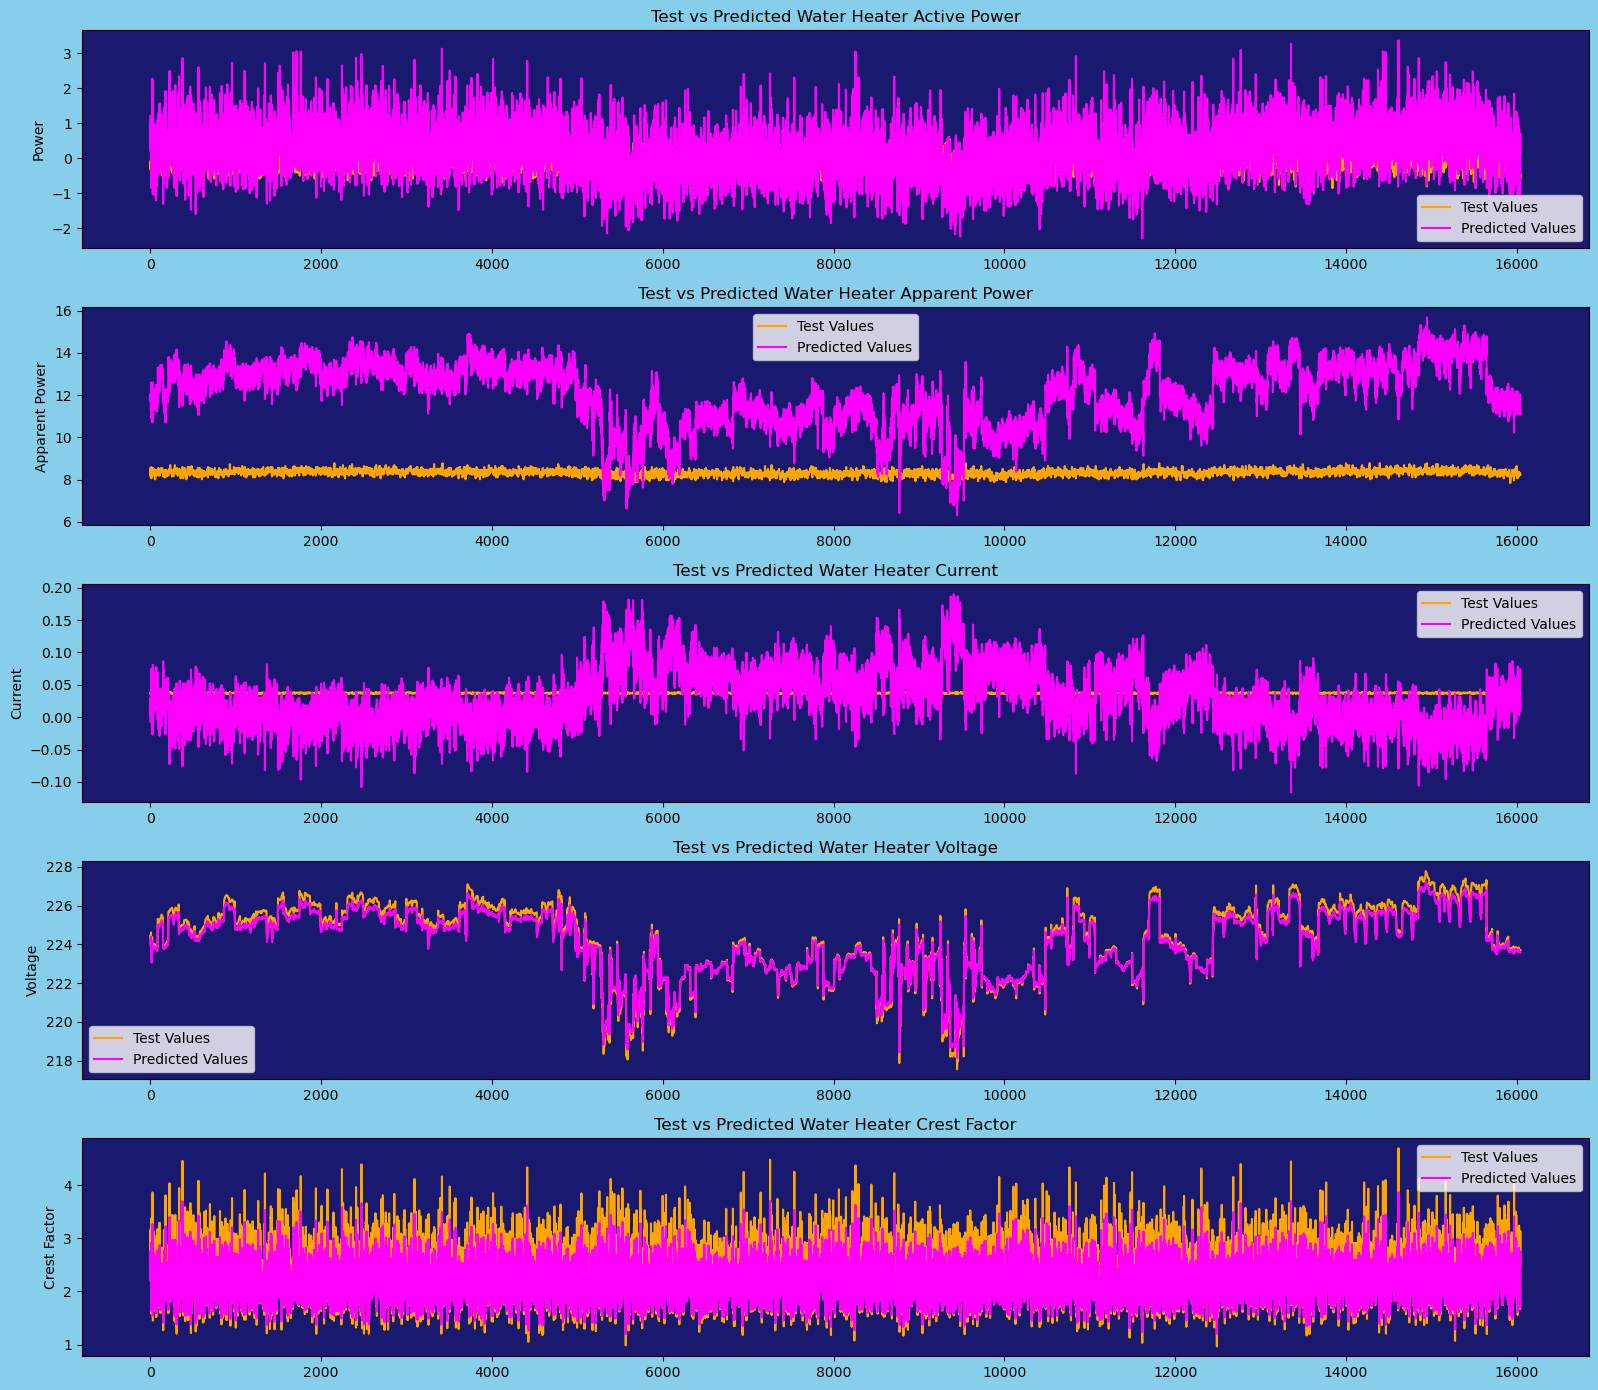

In [15]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Water Heater Active Power')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Water Heater Apparent Power')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Water Heater Current')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Water Heater Voltage')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Water Heater Crest Factor')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


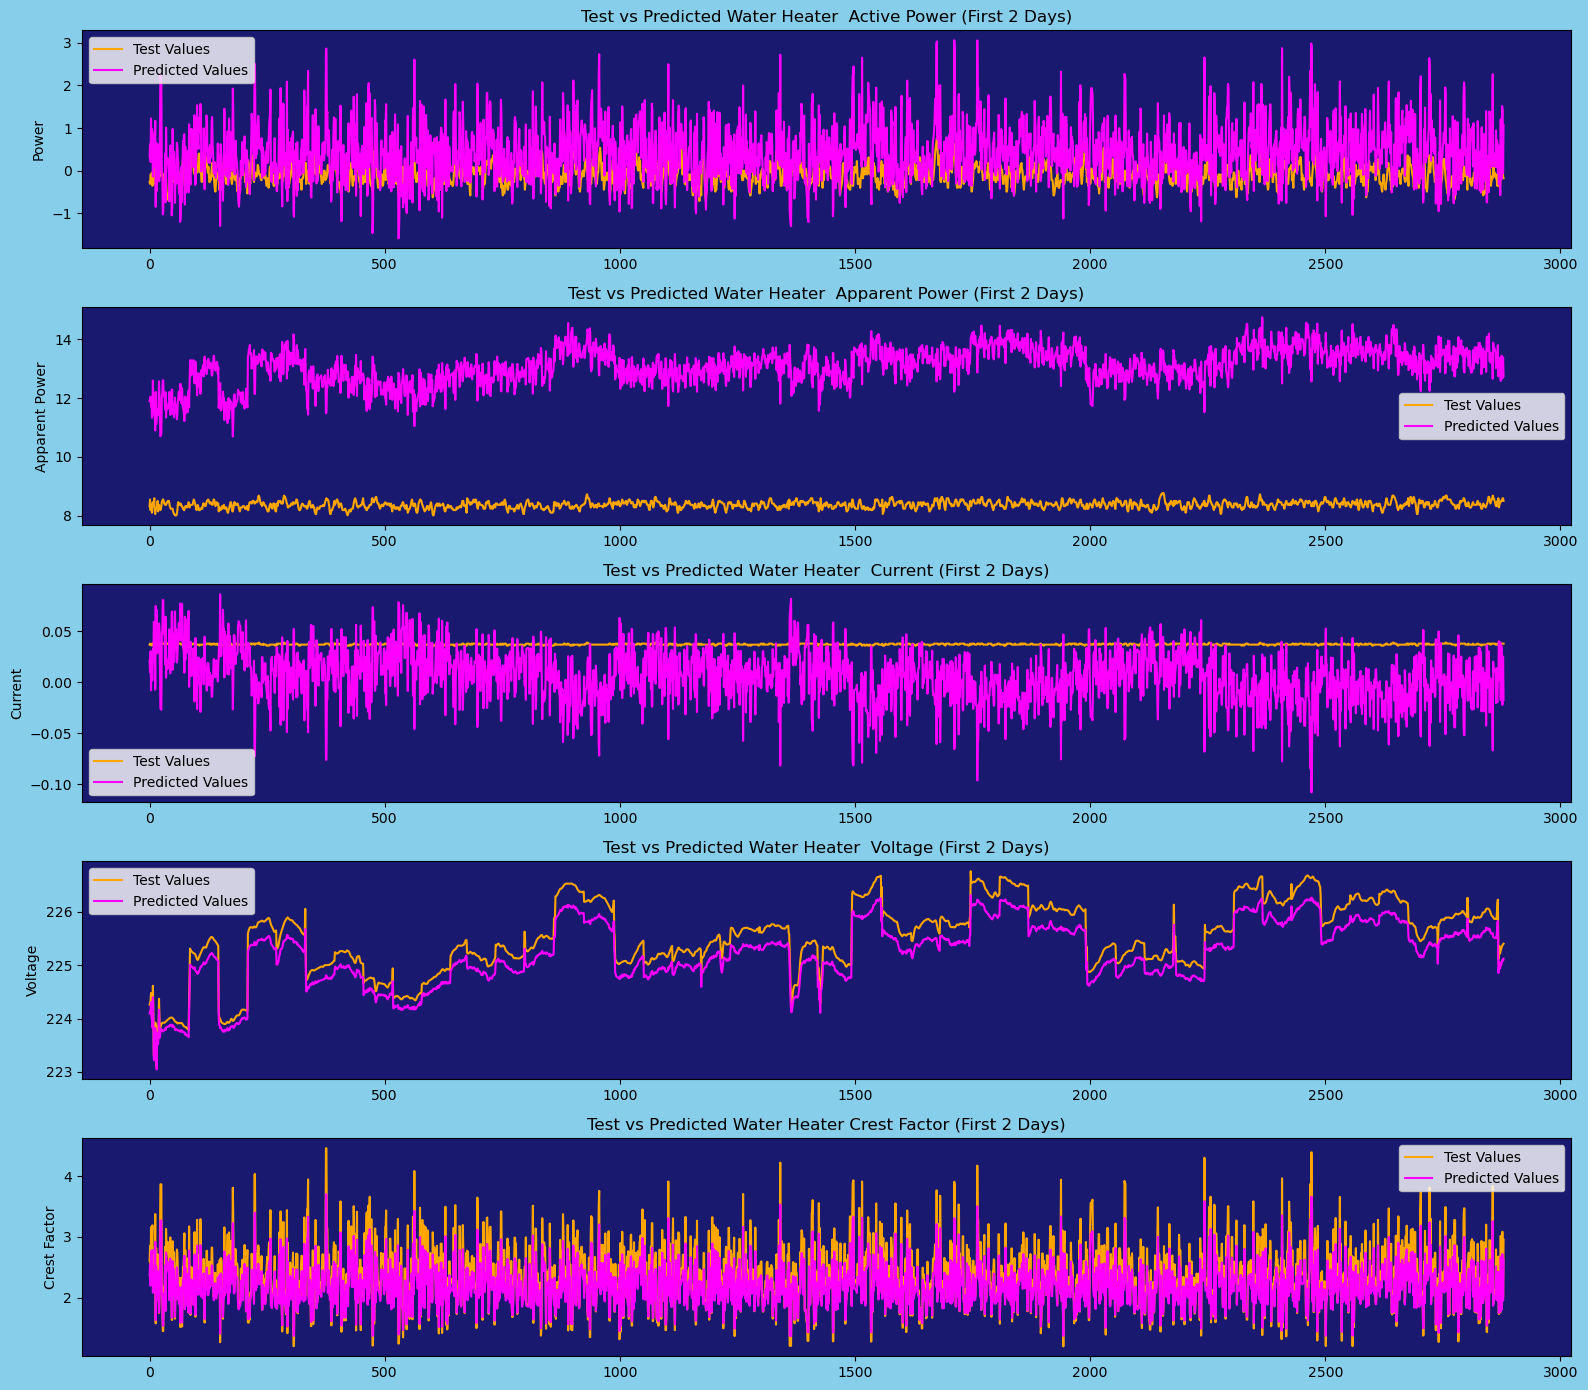

In [16]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('skyblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two days
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Water Heater  Active Power (First 2 Days)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Water Heater  Apparent Power (First 2 Days)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Water Heater  Current (First 2 Days)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Water Heater  Voltage (First 2 Days)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Water Heater Crest Factor (First 2 Days)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


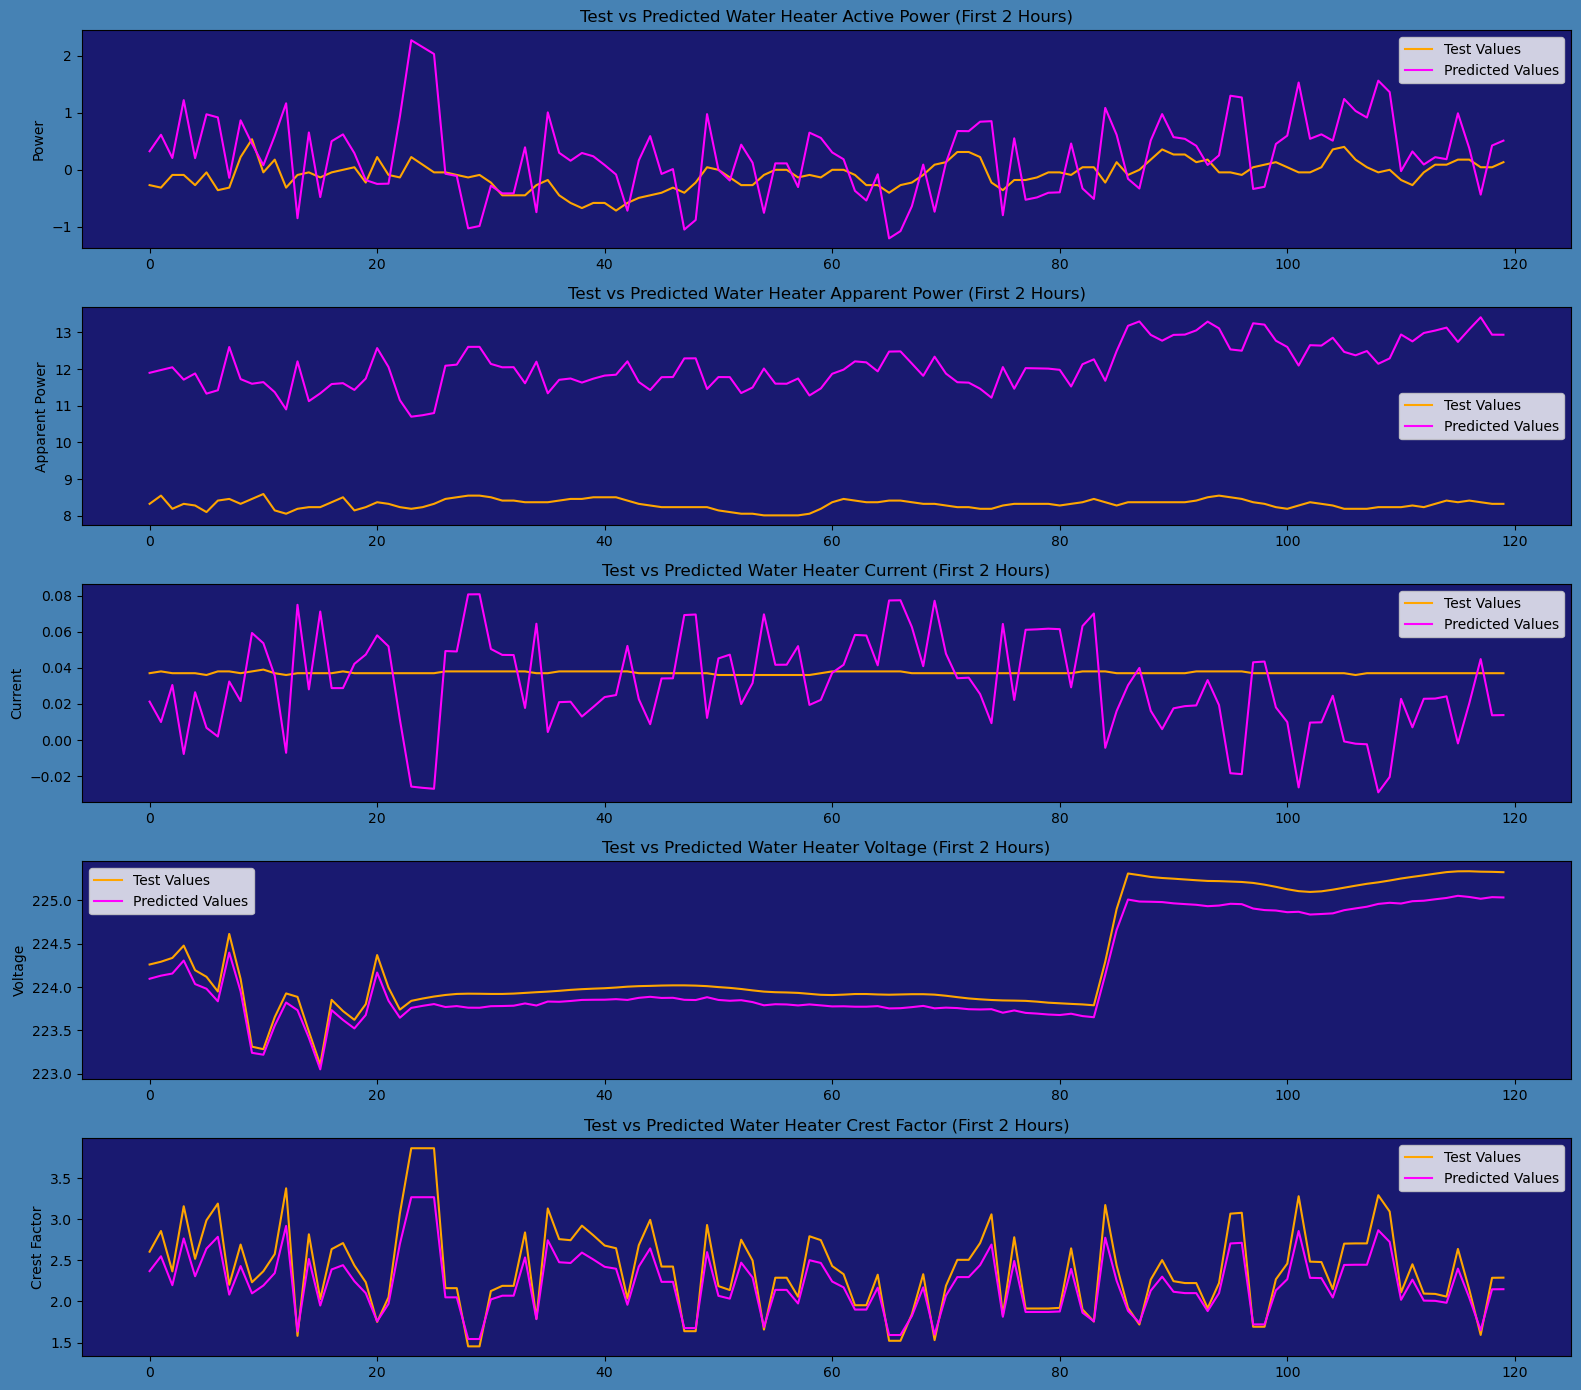

In [17]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('steelblue')
for ax in axs:
    ax.set_facecolor('midnightblue')

# Plot predicted vs test for each column for the first two hours
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Water Heater Active Power (First 2 Hours)')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Water Heater Apparent Power (First 2 Hours)')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Water Heater Current (First 2 Hours)')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Water Heater Voltage (First 2 Hours)')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='magenta')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Water Heater Crest Factor (First 2 Hours)')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()
